In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tqdm import tqdm
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# 1. Load data

In [2]:
conflicts=pd.read_csv('/Users/alexandra/Documents/GA_DSI/DSI5-lessons/projects/project-capstone/Armed_conflict_files/african_conflicts.csv', encoding="latin1",low_memory=False)

In [3]:
conflicts.head(3)

ACTOR1  ACTOR1_ID  \
0  Police Forces of Algeria (1999-)        NaN   
1                 Rioters (Algeria)        NaN   
2              Protesters (Algeria)        NaN   

                             ACTOR2  ACTOR2_ID ACTOR_DYAD_ID      ADMIN1  \
0               Civilians (Algeria)        NaN           NaN  Tizi Ouzou   
1  Police Forces of Algeria (1999-)        NaN           NaN  Tizi Ouzou   
2                               NaN        NaN           NaN      Bejaia   

        ADMIN2 ADMIN3                   ALLY_ACTOR_1  \
0  Beni-Douala    NaN                            NaN   
1   Tizi Ouzou    NaN  Berber Ethnic Group (Algeria)   
2      Amizour    NaN             Students (Algeria)   

                    ALLY_ACTOR_2  ...  INTER1 INTER2 INTERACTION  LATITUDE  \
0  Berber Ethnic Group (Algeria)  ...       1      7          17  36.61954   
1                            NaN  ...       5      1          15  36.71183   
2                            NaN  ...       6      0          60  36.64022   

      LOCATION  LONGITUDE                                              NOTES  \
0  Beni Douala    4.08282  A Berber student was shot while in police cust...   
1   Tizi Ouzou    4.04591  Riots were reported in numerous villages in Ka...   
2      Amizour    4.90131  Students protested in the Amizour area. At lea...   

                    SOURCE  TIME_PRECISION  YEAR  
0  Associated Press Online               1  2001  
1           Kabylie report               1  2001  
2             Crisis Group               1  2001  

[3 rows x 28 columns]

In [4]:
conflicts.shape

(165808, 28)

In [5]:
list(conflicts)

['ACTOR1',
 'ACTOR1_ID',
 'ACTOR2',
 'ACTOR2_ID',
 'ACTOR_DYAD_ID',
 'ADMIN1',
 'ADMIN2',
 'ADMIN3',
 'ALLY_ACTOR_1',
 'ALLY_ACTOR_2',
 'COUNTRY',
 'EVENT_DATE',
 'EVENT_ID_CNTY',
 'EVENT_ID_NO_CNTY',
 'EVENT_TYPE',
 'FATALITIES',
 'GEO_PRECISION',
 'GWNO',
 'INTER1',
 'INTER2',
 'INTERACTION',
 'LATITUDE',
 'LOCATION',
 'LONGITUDE',
 'NOTES',
 'SOURCE',
 'TIME_PRECISION',
 'YEAR']

In [6]:
conflicts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165808 entries, 0 to 165807
Data columns (total 28 columns):
ACTOR1              165808 non-null object
ACTOR1_ID           140747 non-null float64
ACTOR2              122255 non-null object
ACTOR2_ID           140747 non-null float64
ACTOR_DYAD_ID       140747 non-null object
ADMIN1              165808 non-null object
ADMIN2              165676 non-null object
ADMIN3              86933 non-null object
ALLY_ACTOR_1        28144 non-null object
ALLY_ACTOR_2        19651 non-null object
COUNTRY             165808 non-null object
EVENT_DATE          165808 non-null object
EVENT_ID_CNTY       165808 non-null object
EVENT_ID_NO_CNTY    140747 non-null float64
EVENT_TYPE          165808 non-null object
FATALITIES          165808 non-null int64
GEO_PRECISION       165808 non-null int64
GWNO                165808 non-null int64
INTER1              165808 non-null int64
INTER2              165808 non-null int64
INTERACTION         165808 non-nul

In [7]:
conflicts.describe()

ACTOR1_ID      ACTOR2_ID  EVENT_ID_NO_CNTY     FATALITIES  \
count  140747.000000  140747.000000     140747.000000  165808.000000   
mean     2587.796692    1211.638820      70374.000000       4.420257   
std      1030.065824    1242.978894      40630.303506      76.071441   
min         1.000000       0.000000          1.000000       0.000000   
25%      2081.000000       0.000000      35187.500000       0.000000   
50%      3043.000000     675.000000      70374.000000       0.000000   
75%      3288.000000    2229.000000     105560.500000       1.000000   
max      3960.000000    3960.000000     140747.000000   25000.000000   

       GEO_PRECISION           GWNO         INTER1         INTER2  \
count  165808.000000  165808.000000  165808.000000  165808.000000   
mean        1.261061     538.296964       3.385500       3.193603   
std         0.524248      61.974200       2.033114       2.920635   
min         1.000000     404.000000       1.000000       0.000000   
25%         1.000000     490.000000       1.000000       0.000000   
50%         1.000000     520.000000       3.000000       2.000000   
75%         1.000000     615.000000       5.000000       7.000000   
max         3.000000     651.000000       8.000000       8.000000   

         INTERACTION  TIME_PRECISION           YEAR  
count  165808.000000   165808.000000  165808.000000  
mean       32.001604        1.138751    2010.760898  
std        18.284381        0.441038       5.897476  
min        10.000000        1.000000    1997.000000  
25%        15.000000        1.000000    2007.000000  
50%        28.000000        1.000000    2013.000000  
75%        47.000000        1.000000    2016.000000  
max        88.000000        3.000000    2017.000000

In [8]:
from pandas_summary import DataFrameSummary as DFS
dfs = DFS(conflicts)
dfs.summary().T

count     mean       std   min      25%    50%     75%  \
ACTOR1               NaN      NaN       NaN   NaN      NaN    NaN     NaN   
ACTOR1_ID         140747   2587.8   1030.07     1     2081   3043    3288   
ACTOR2               NaN      NaN       NaN   NaN      NaN    NaN     NaN   
ACTOR2_ID         140747  1211.64   1242.98     0        0    675    2229   
ACTOR_DYAD_ID        NaN      NaN       NaN   NaN      NaN    NaN     NaN   
ADMIN1               NaN      NaN       NaN   NaN      NaN    NaN     NaN   
ADMIN2               NaN      NaN       NaN   NaN      NaN    NaN     NaN   
ADMIN3               NaN      NaN       NaN   NaN      NaN    NaN     NaN   
ALLY_ACTOR_1         NaN      NaN       NaN   NaN      NaN    NaN     NaN   
ALLY_ACTOR_2         NaN      NaN       NaN   NaN      NaN    NaN     NaN   
COUNTRY              NaN      NaN       NaN   NaN      NaN    NaN     NaN   
EVENT_DATE           NaN      NaN       NaN   NaN      NaN    NaN     NaN   
EVENT_ID_CNTY        NaN      NaN       NaN   NaN      NaN    NaN     NaN   
EVENT_ID_NO_CNTY  140747    70374   40630.3     1  35187.5  70374  105560   
EVENT_TYPE           NaN      NaN       NaN   NaN      NaN    NaN     NaN   
FATALITIES        165808  4.42026   76.0714     0        0      0       1   
GEO_PRECISION     165808  1.26106  0.524248     1        1      1       1   
GWNO              165808  538.297   61.9742   404      490    520     615   
INTER1            165808   3.3855   2.03311     1        1      3       5   
INTER2            165808   3.1936   2.92064     0        0      2       7   
INTERACTION       165808  32.0016   18.2844    10       15     28      47   
LATITUDE             NaN      NaN       NaN   NaN      NaN    NaN     NaN   
LOCATION             NaN      NaN       NaN   NaN      NaN    NaN     NaN   
LONGITUDE            NaN      NaN       NaN   NaN      NaN    NaN     NaN   
NOTES                NaN      NaN       NaN   NaN      NaN    NaN     NaN   
SOURCE               NaN      NaN       NaN   NaN      NaN    NaN     NaN   
TIME_PRECISION    165808  1.13875  0.441038     1        1      1       1   
YEAR              165808  2010.76   5.89748  1997     2007   2013    2016   

                     max  counts uniques missing missing_perc        types  
ACTOR1               NaN  165808    3288       0           0%  categorical  
ACTOR1_ID           3960  140747    3032   25061       15.11%      numeric  
ACTOR2               NaN  122255    2827   43553       26.27%  categorical  
ACTOR2_ID           3960  140747    2558   25061       15.11%      numeric  
ACTOR_DYAD_ID        NaN  140747    9520   25061       15.11%  categorical  
ADMIN1               NaN  165808     735       0           0%  categorical  
ADMIN2               NaN  165676    4085     132        0.08%  categorical  
ADMIN3               NaN   86933    4795   78875       47.57%  categorical  
ALLY_ACTOR_1         NaN   28144    3272  137664       83.03%  categorical  
ALLY_ACTOR_2         NaN   19651    2759  146157       88.15%  categorical  
COUNTRY              NaN  165808      50       0           0%  categorical  
EVENT_DATE           NaN  165808    7639       0           0%  categorical  
EVENT_ID_CNTY        NaN  165808  155591       0           0%  categorical  
EVENT_ID_NO_CNTY  140747  140747  140747   25061       15.11%      numeric  
EVENT_TYPE           NaN  165808      14       0           0%  categorical  
FATALITIES         25000  165808     263       0           0%      numeric  
GEO_PRECISION          3  165808       3       0           0%      numeric  
GWNO                 651  165808      49       0           0%      numeric  
INTER1                 8  165808       8       0           0%      numeric  
INTER2                 8  165808       9       0           0%      numeric  
INTERACTION           88  165808      43       0           0%      numeric  
LATITUDE             NaN  165808   19082       0           0%  categorical  
LOCATION      

# 2. EDA - part A: Univariate analysis

A) Change to lowercase

In [9]:
conflicts.columns = [x.lower() for x in conflicts.columns]

B) Check for nulls

In [10]:
conflicts.isnull().sum()

actor1                   0
actor1_id            25061
actor2               43553
actor2_id            25061
actor_dyad_id        25061
admin1                   0
admin2                 132
admin3               78875
ally_actor_1        137664
ally_actor_2        146157
country                  0
event_date               0
event_id_cnty            0
event_id_no_cnty     25061
event_type               0
fatalities               0
geo_precision            0
gwno                     0
inter1                   0
inter2                   0
interaction              0
latitude                 0
location                 3
longitude                0
notes                10227
source                 173
time_precision           0
year                     0
dtype: int64

I have some nulls but not in the columns i'm most interested in. Most likely i will not use the columns with the nulls other than hte source and the notes which i will use in the NLP section of the project. At this stage i'm not yet making a final decision about which columns to keep or remove.

**Country**

In [11]:
conflicts['country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad',
       'Democratic Republic of Congo', 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
       'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Republic of Congo',
       'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia',
       'Uganda', 'Zambia', 'Zimbabwe', 'Botswana', 'Djibouti',
       'Mozambique '], dtype=object)

**I've noticed a problem with Mozambique as it appears twice. 

In [12]:
conflicts.country.replace({"Mozambique ": "Mozambique" },inplace=True)

In [13]:
len(conflicts.country.unique())

49

Oh joy, so from 1996 until 2017 there have incidents of armed conflict recorded in 49 out of the 54 currently 'officially' recognized countries. Depending on who you ask africa has between 47-58 countries but i'm going with UN official number of 54. Countries with no recorded incidents include: cape verde, seychelles, comorros, sao tome. all islands and with the exception of sao tome who is too closed off, these countries have active and profitable tourism industries.

so clearly being an island with tourism potential lowers your risk of conflict. make sure you use number of neighbours as predictor as well as tourism data from world bank.

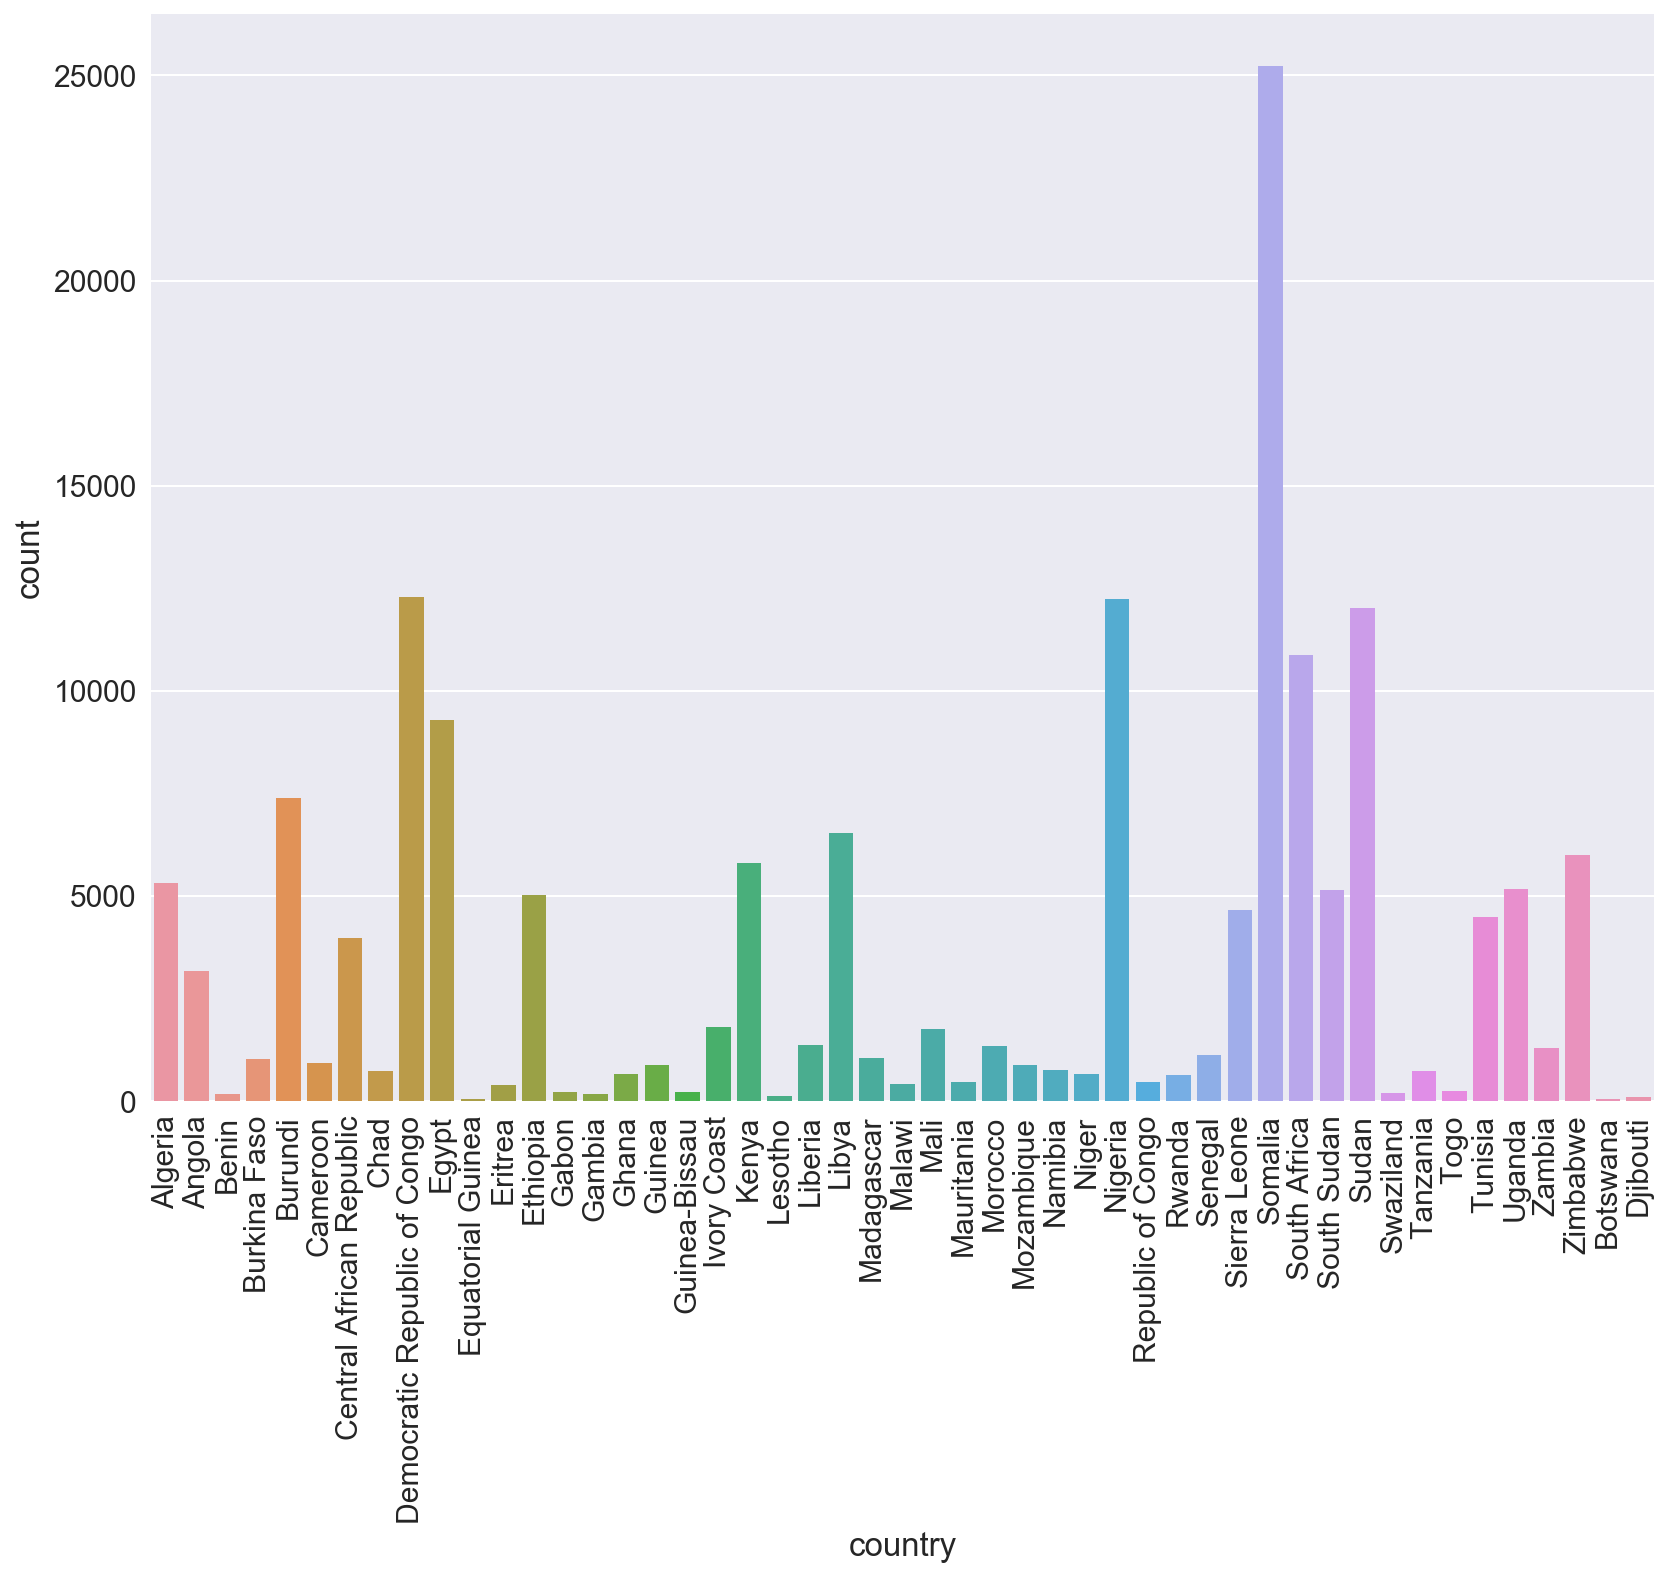

In [14]:
fig, ax = plt.subplots(figsize=(12,10))

sns.countplot(conflicts['country'], label='Count', ax=ax)
plt.xticks(rotation=90)
plt.show()

**Event Type**

In [15]:
conflicts.event_type.value_counts()

Riots/Protests                                47224
Violence against civilians                    45021
Battle-No change of territory                 44005
Strategic development                         10923
Remote violence                               10456
Battle-Government regains territory            2632
Non-violent transfer of territory              2566
Battle-Non-state actor overtakes territory     2135
Headquarters or base established                771
Remote Violence                                  30
Violence Against Civilians                       21
Battle-no change of territory                    16
Strategic Development                             7
Strategic development                             1
Name: event_type, dtype: int64

Spelling mistakes have lead to some errors in event descriptions. Simple cleanup required.

In [16]:
conflicts.event_type.replace({"Violence Against Civilians": "Violence against civilians","Strategic Development":"Strategic development","Strategic development ":"Strategic development", "Remote Violence":"Remote violence", "Battle-no change of territory":"Battle-No change of territory"},inplace=True)

In [17]:
conflicts.event_type.value_counts()

Riots/Protests                                47224
Violence against civilians                    45042
Battle-No change of territory                 44021
Strategic development                         10931
Remote violence                               10486
Battle-Government regains territory            2632
Non-violent transfer of territory              2566
Battle-Non-state actor overtakes territory     2135
Headquarters or base established                771
Name: event_type, dtype: int64

In [18]:
len(conflicts.event_type)

165808

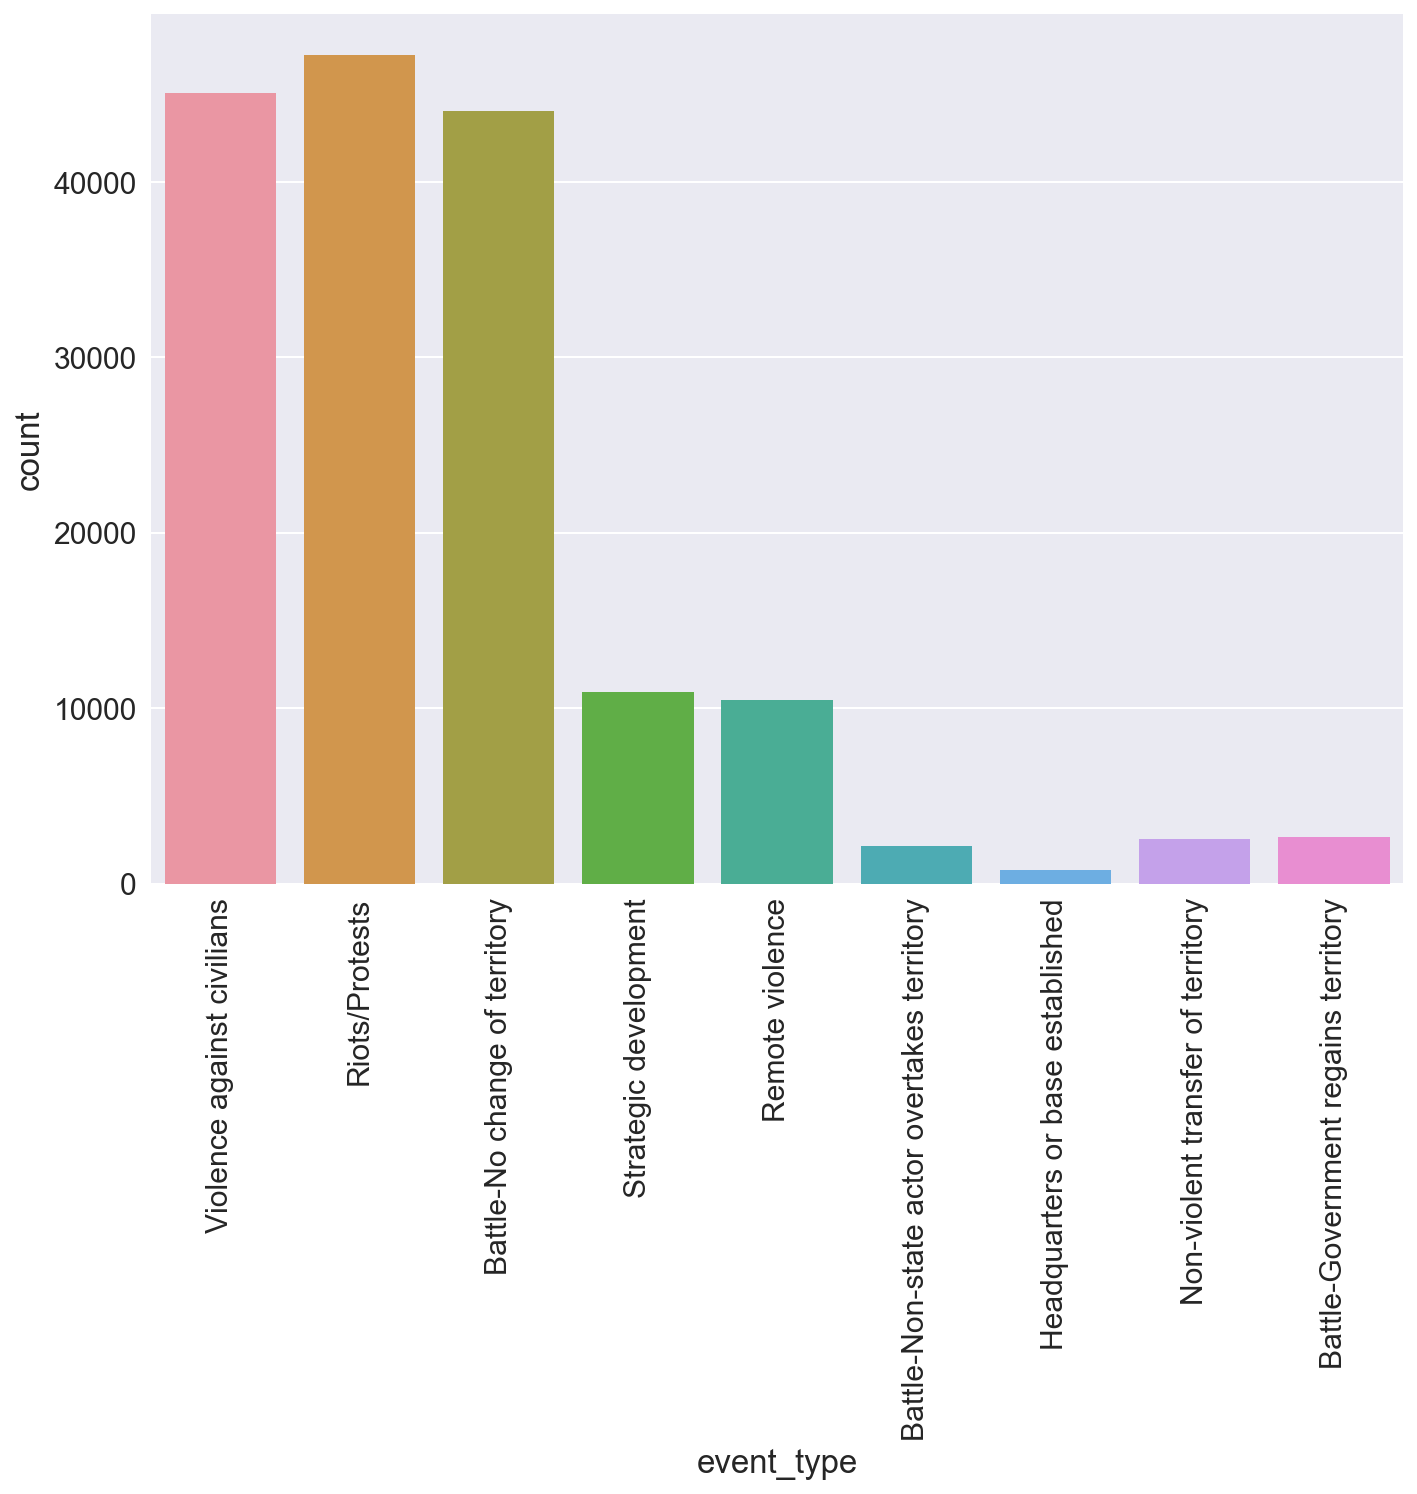

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

sns.countplot(conflicts['event_type'], label='Count', ax=ax)
plt.xticks(rotation=90)
plt.show()

**Actor**

In [20]:
# conflicts.actor1.unique().sum()

In [21]:
conflicts.actor1.describe()

count                                 165808
unique                                  3288
top       Unidentified Armed Group (Somalia)
freq                                    5896
Name: actor1, dtype: object

Clearly a large collection of different groups but they tend to fall into teh same categories so let's look at their categories. ACLED provides ua with a simplified version (inter1).

**Explanation:**

    1- Government and State Security
    2- Rebel Groups
    3- Political Militias
    4- Identity Militias
    5- Rioters
    6- Protesters
    7- Civilians 
    8- External/Other Forces

In [22]:
conflicts.inter1.value_counts()

1    41906
3    37034
6    31610
2    21958
5    15531
4    11252
8     6477
7       40
Name: inter1, dtype: int64

Inter2 refers to whom the action was carried out on.

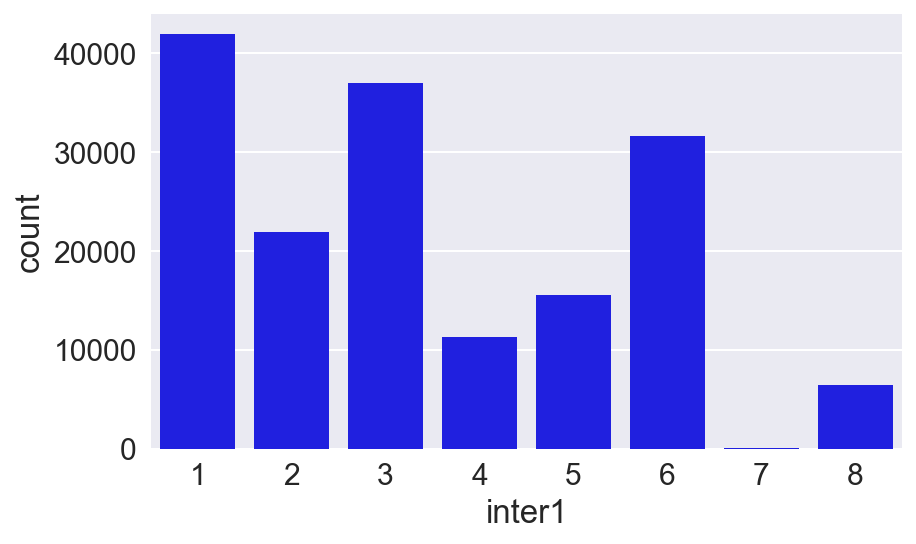

In [23]:
sns.countplot(conflicts['inter1'], color="b")
plt.show()

In [24]:
conflicts.inter2.value_counts()

7    50765
0    43553
1    24588
2    20414
3    13655
4     6035
8     2677
5     2493
6     1628
Name: inter2, dtype: int64

Inter2 has an extra value (0) refering to the actions that didnt target a specific group

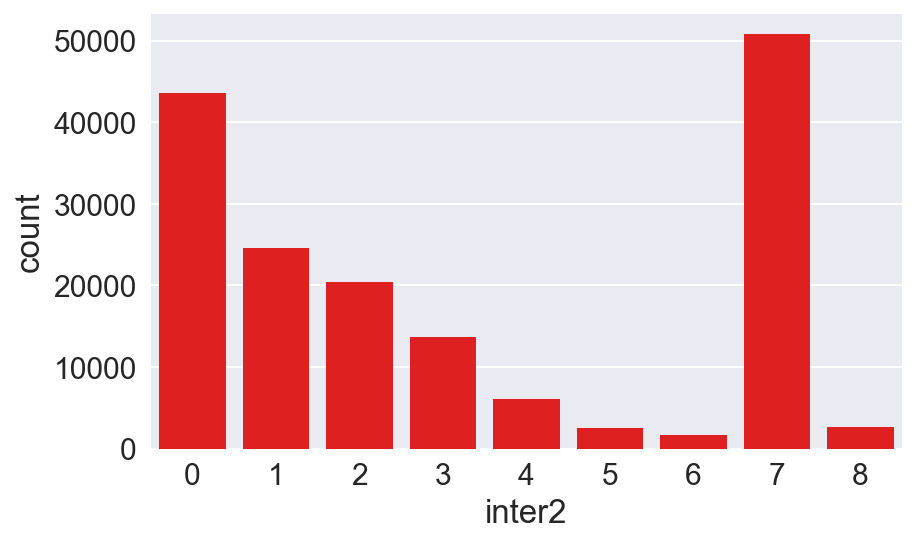

In [25]:
sns.countplot(conflicts['inter2'], color="r")
plt.show()

**Interaction**

In [26]:
conflicts['interaction'].describe()

count    165808.000000
mean         32.001604
std          18.284381
min          10.000000
25%          15.000000
50%          28.000000
75%          47.000000
max          88.000000
Name: interaction, dtype: float64

In [27]:
conflicts['interaction'].value_counts()

60    27953
37    23436
12    21299
13    14721
17    10277
27     9900
15     7279
50     6514
47     5375
16     4774
44     4331
28     4037
20     3023
30     2805
23     2420
33     2246
10     2170
38     1740
11     1706
14     1531
55     1407
18     1029
57      889
78      883
80      853
34      785
24      558
22      546
58      257
40      212
35      148
36      142
48      127
66       89
68       82
56       75
88       73
45       27
26       24
70       23
25       20
46       11
77       11
Name: interaction, dtype: int64

In [28]:
len(conflicts['interaction'].unique())

43

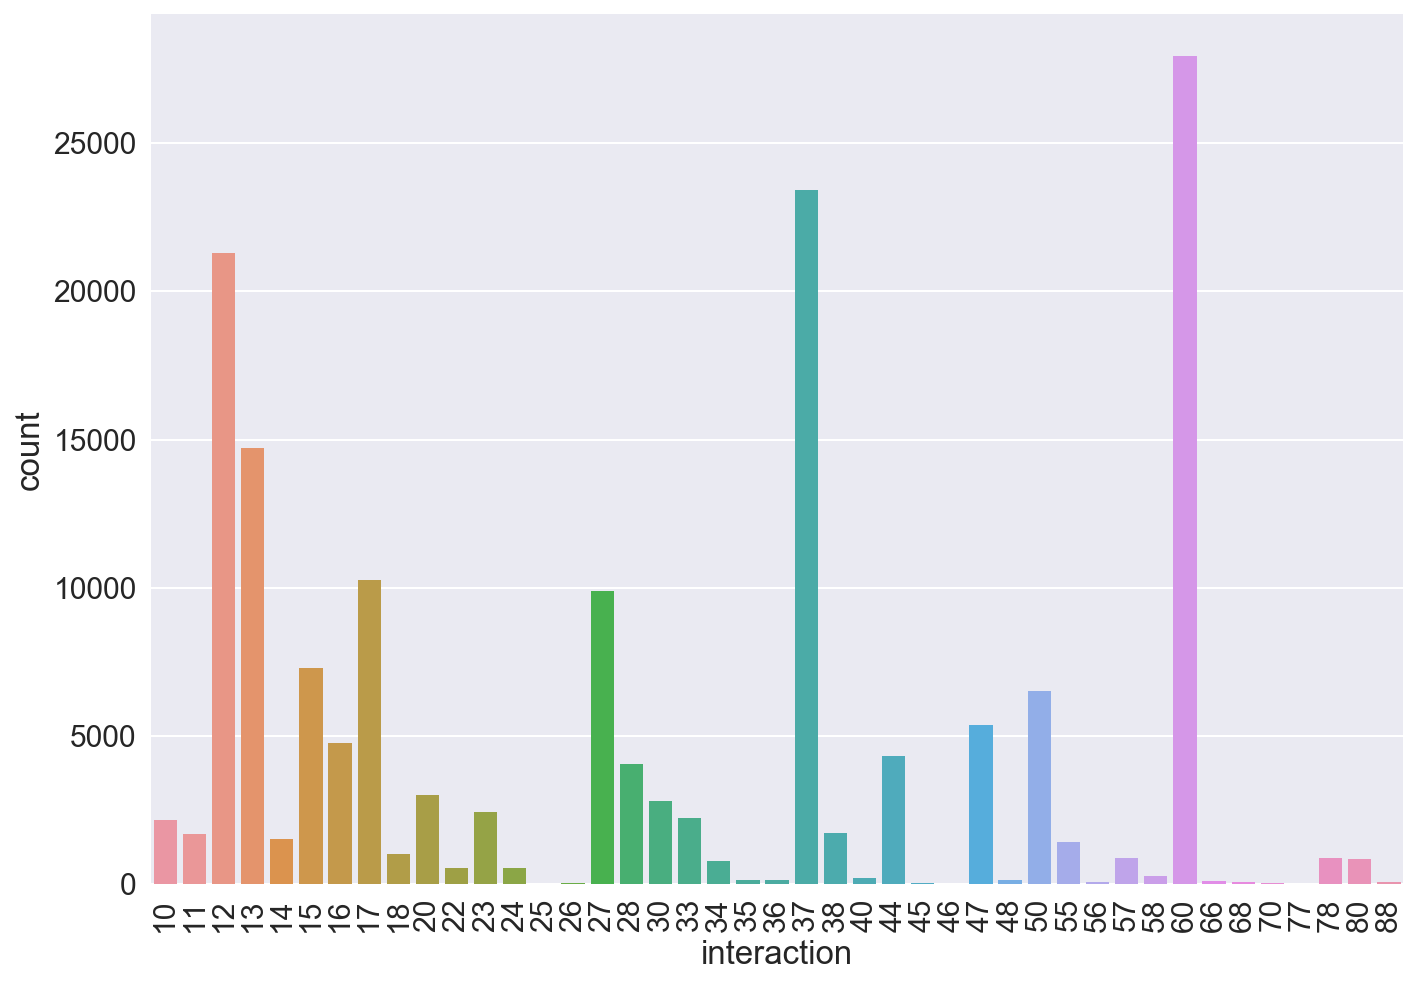

In [29]:
fig, ax = plt.subplots(figsize=(10,8))

sns.countplot(conflicts['interaction'], label='Count', ax=ax)
plt.xticks(rotation=90)
plt.show()

**Fatalities**

In [30]:
conflicts.fatalities.describe()

count    165808.000000
mean          4.420257
std          76.071441
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max       25000.000000
Name: fatalities, dtype: float64

In [31]:
conflicts.fatalities.value_counts().head(10)

0     113321
1      18316
2       7978
3       4628
4       3026
5       2623
10      2541
6       1657
7       1403
8        990
Name: fatalities, dtype: int64

Fatalities need to be analysed with other features to get more meaning from this.

**year**

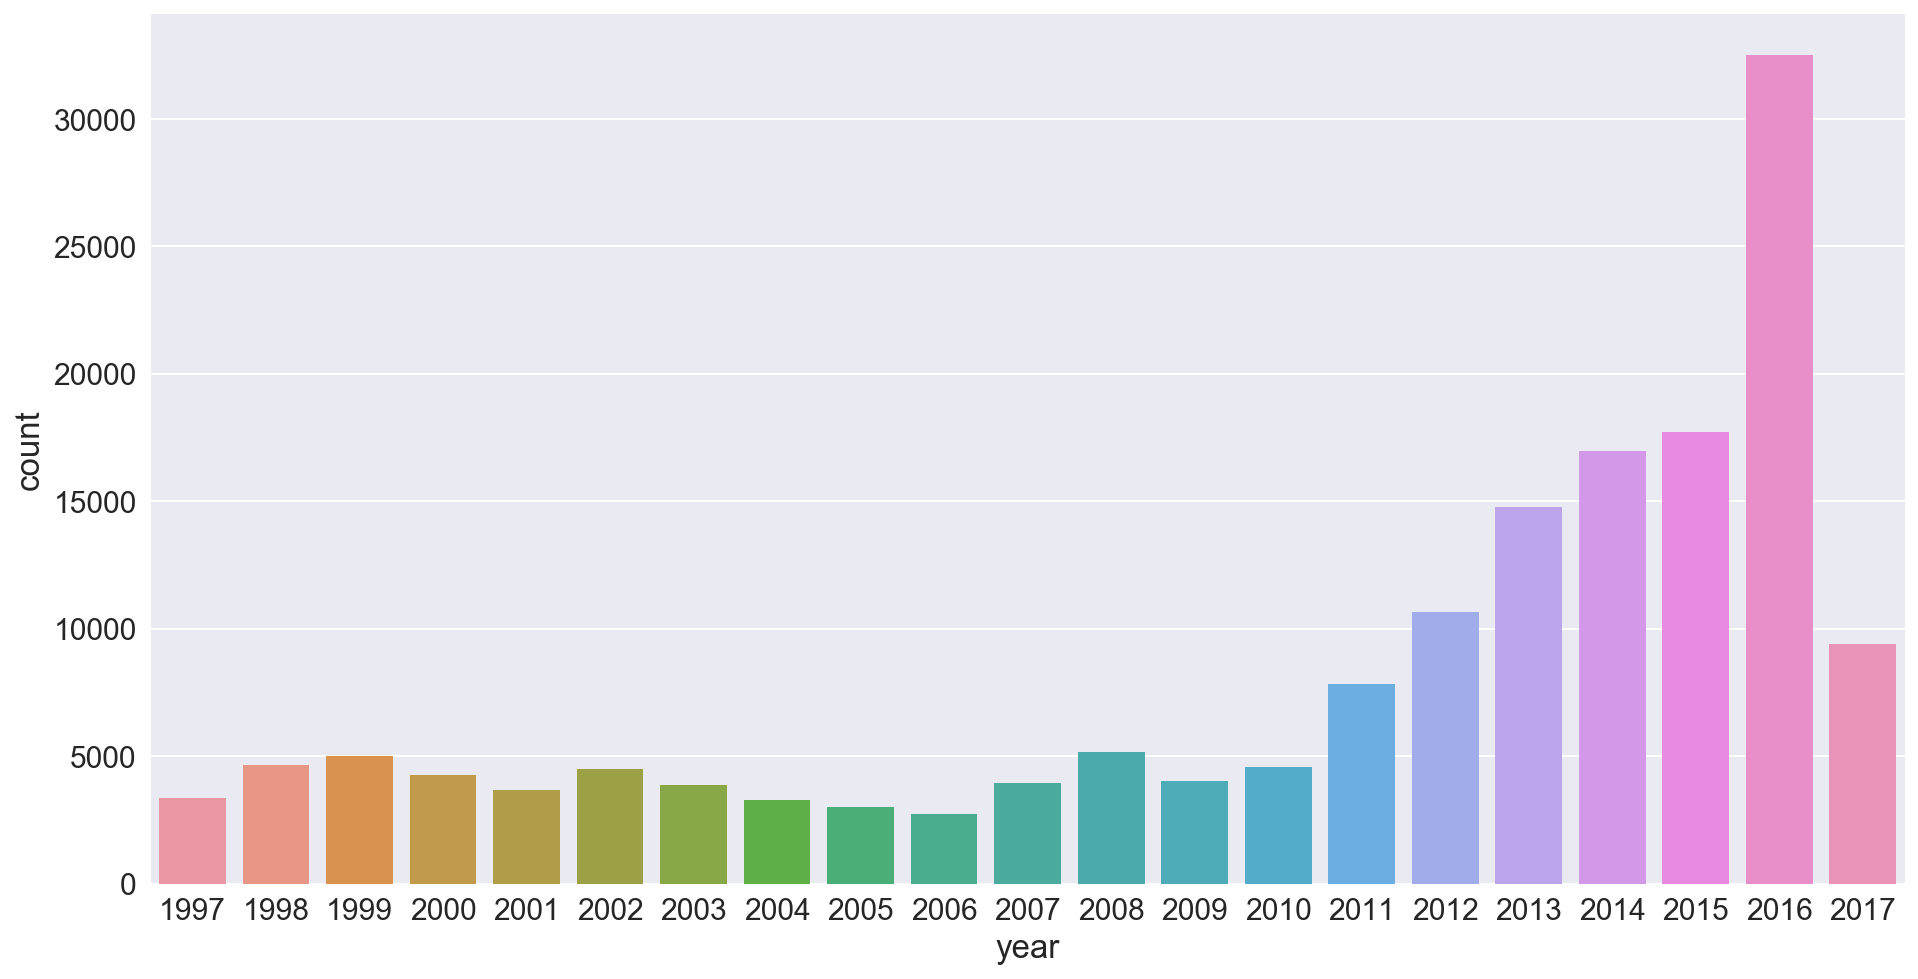

In [32]:
fig, ax = plt.subplots(figsize=(14,8))

sns.countplot(conflicts['year'], ax=ax)
plt.show()

### Bivariate analysis

In [33]:
grouped1=conflicts.groupby(['event_type', 'inter1'])
grouped1.size().head(20)

event_type                                  inter1
Battle-Government regains territory         1          1875
                                            2           271
                                            3           185
                                            4             6
                                            8           295
Battle-No change of territory               1         20120
                                            2          7008
                                            3          8684
                                            4          5384
                                            8          2825
Battle-Non-state actor overtakes territory  1           803
                                            2           788
                                            3           339
                                            4            92
                                            8           113
Headquarters or base established            1    

In [34]:
event_type_actor=pd.crosstab(index=conflicts['inter1'], columns=conflicts['event_type'])
event_type_actor

event_type  Battle-Government regains territory  \
inter1                                            
1                                          1875   
2                                           271   
3                                           185   
4                                             6   
5                                             0   
6                                             0   
7                                             0   
8                                           295   

event_type  Battle-No change of territory  \
inter1                                      
1                                   20120   
2                                    7008   
3                                    8684   
4                                    5384   
5                                       0   
6                                       0   
7                                       0   
8                                    2825   

event_type  Battle-Non-state actor overtakes territory  \
inter1                                                   
1                                                  803   
2                                                  788   
3                                                  339   
4                                                   92   
5                                                    0   
6                                                    0   
7                                                    0   
8                                                  113   

event_type  Headquarters or base established  \
inter1                                         
1                                         65   
2                                        318   
3                                        250   
4                                          3   
5                                          0   
6                                          0   
7                                          0   
8                                        135   

event_type  Non-violent transfer of territory  Remote violence  \
inter1                                                           
1                                         399             4187   
2                                        1248             1328   
3                                         442             3423   
4                                          27               93   
5                                           0                4   
6                                           1                1   
7                                           1                2   
8                                         448             1448   

event_type  Riots/Protests  Strategic development  Violence against civilians  
inter1                                                                         
1                     1584                   4772                        8101  
2                        3                   2441                        8553  
3                       48                   2756                       20907  
4                        6                    352                        5289  
5                    14619                      5                         903  
6                    30941                     13                         654  
7                        0                     37                           0  
8                       23                    555                         635

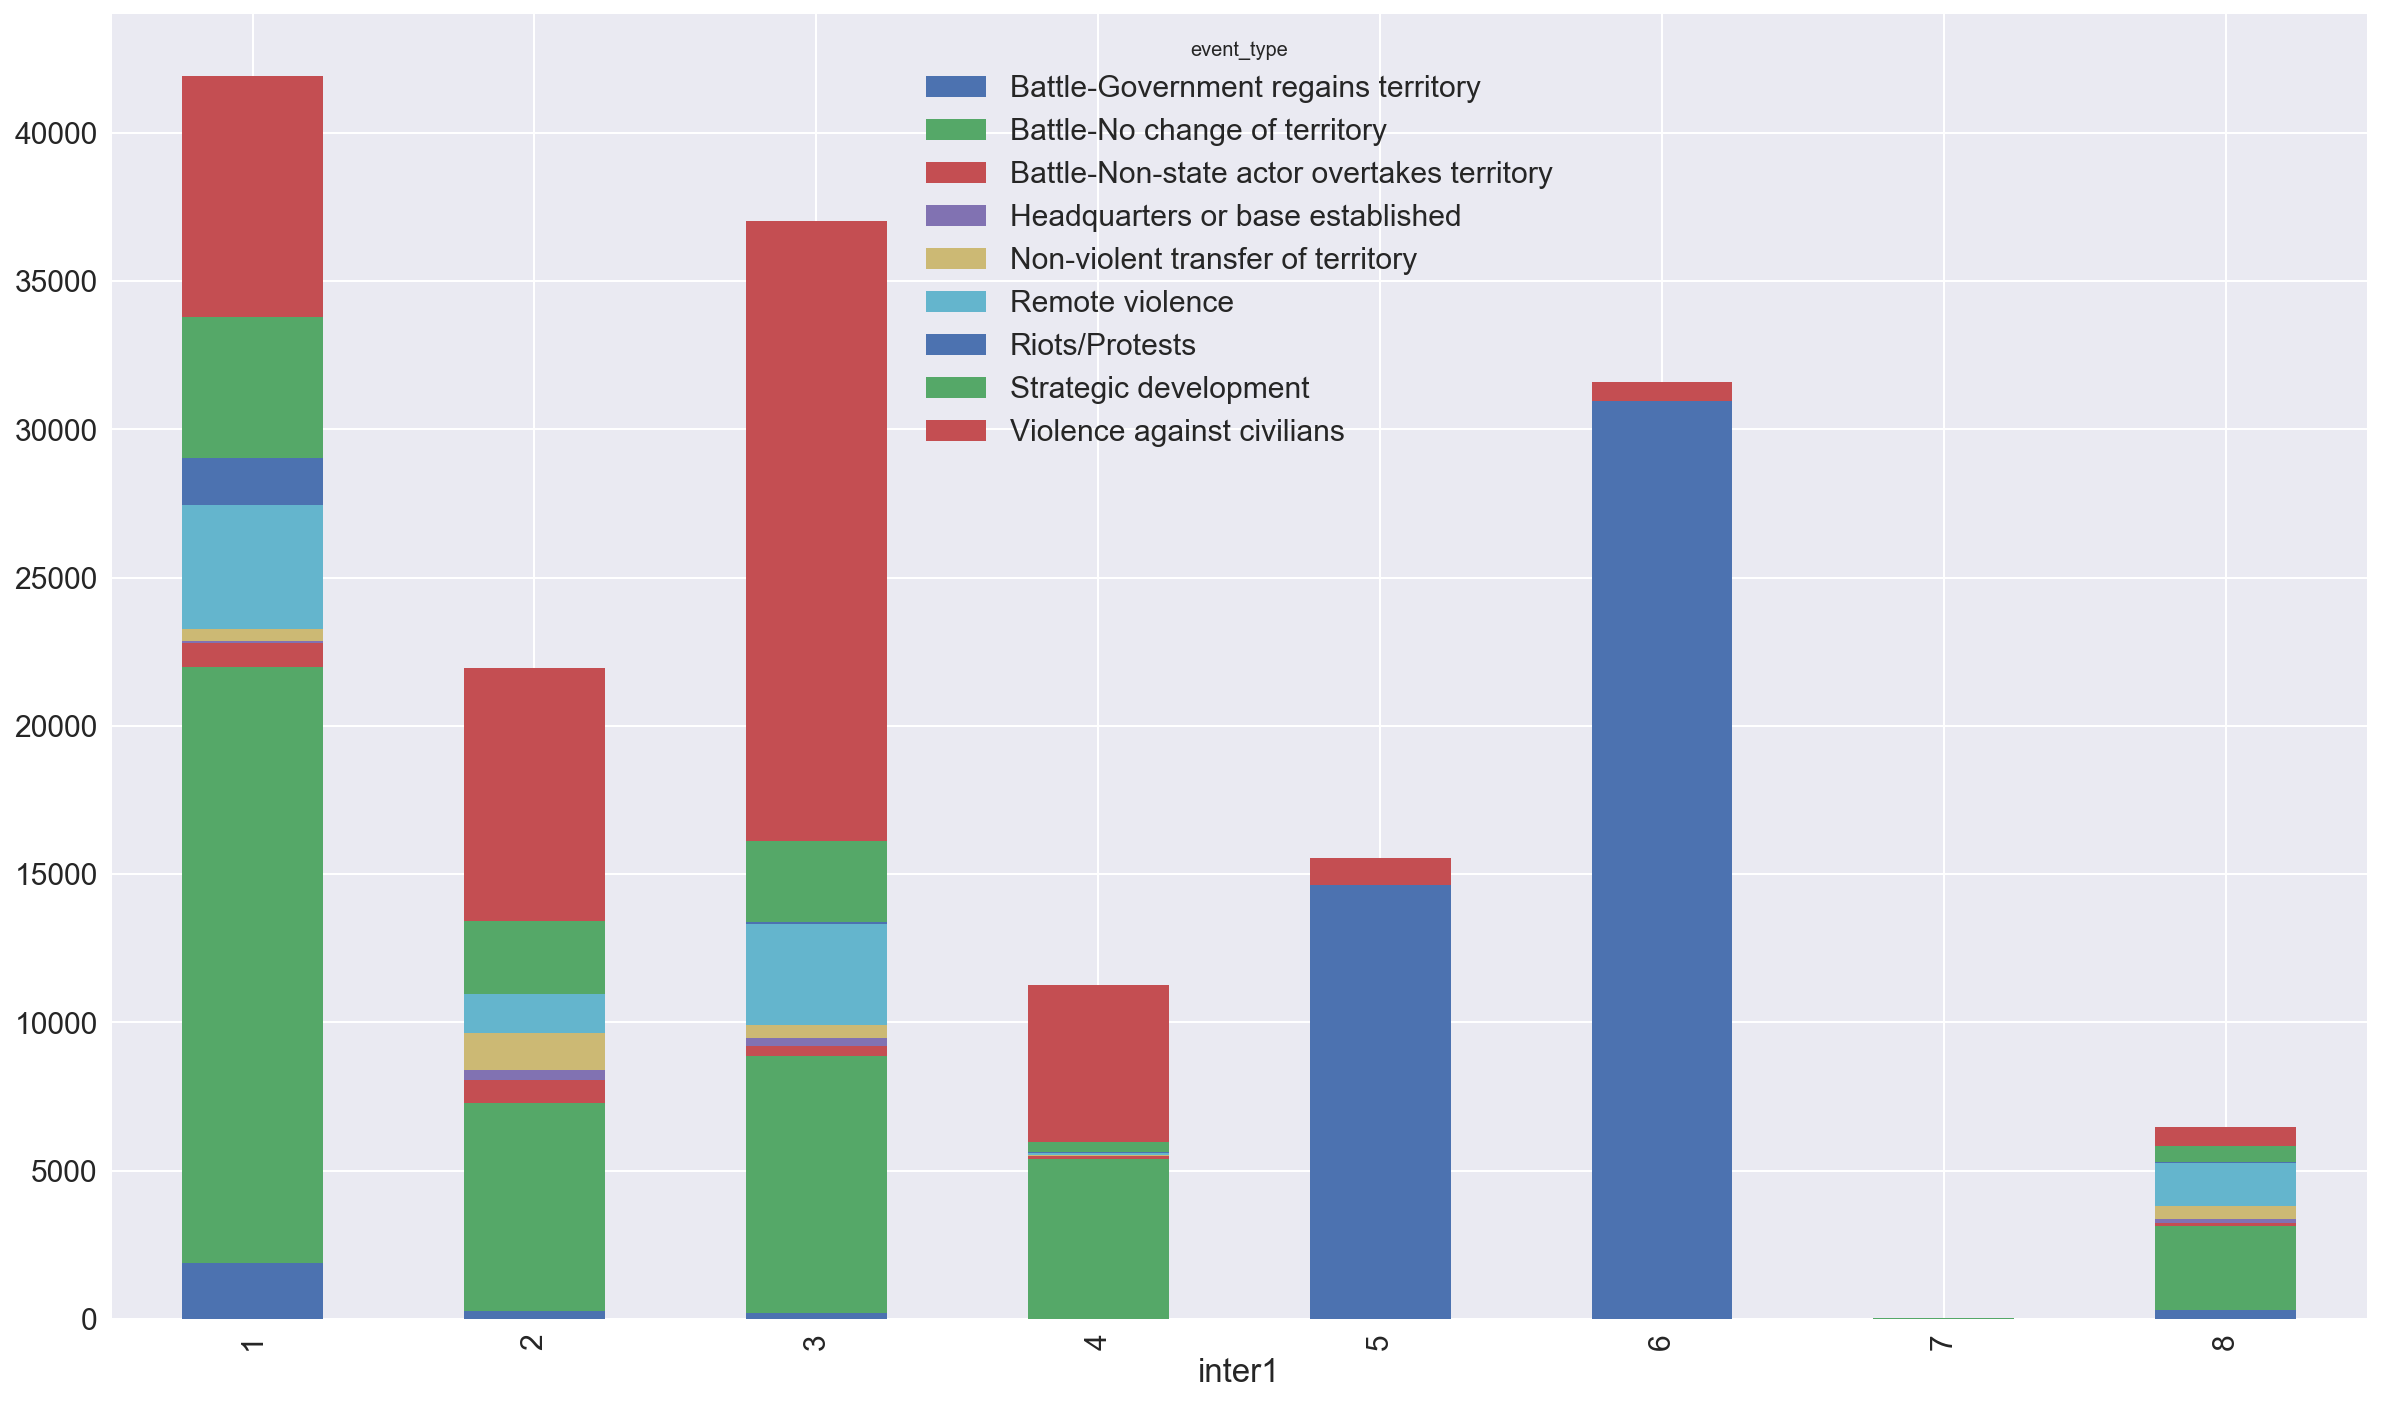

In [35]:
event_type_actor.plot(kind='bar', figsize=(18,12), stacked=True)

In [36]:
event_type_year=pd.crosstab(index=conflicts['year'], columns=conflicts['event_type'])
event_type_year

event_type  Battle-Government regains territory  \
year                                              
1997                                        152   
1998                                        206   
1999                                        208   
2000                                         85   
2001                                         93   
2002                                         75   
2003                                         69   
2004                                         23   
2005                                         41   
2006                                         69   
2007                                         35   
2008                                         65   
2009                                         78   
2010                                         37   
2011                                         85   
2012                                        101   
2013                                        110   
2014                                        149   
2015                                        219   
2016                                        594   
2017                                        138   

event_type  Battle-No change of territory  \
year                                        
1997                                  916   
1998                                 1286   
1999                                 2332   
2000                                 1688   
2001                                 1322   
2002                                 1491   
2003                                 1302   
2004                                 1020   
2005                                  872   
2006                                  950   
2007                                 1466   
2008                                 1793   
2009                                 1128   
2010                                 1435   
2011                                 1760   
2012                                 2333   
2013                                 3745   
2014                                 4412   
2015                                 3891   
2016                                 6695   
2017                                 2184   

event_type  Battle-Non-state actor overtakes territory  \
year                                                     
1997                                               159   
1998                                               177   
1999                                               158   
2000                                                73   
2001                                                96   
2002                                               198   
2003                                               126   
2004                                                21   
2005                                                 8   
2006                                                66   
2007                                                24   
2008                                                54   
2009                                                51   
2010                                                12   
2011                                               134   
2012                                               113   
2013                                               101   
2014                                               145   
2015                                               150   
2016                                               204   
2017                                                65   

event_type  Headquarters or base established  \
year                                           
1997                                     102   
1998                                     133   
1999                                      64   
2000                                      84   
2001                                      27   
2002                                      41   
2003                                      27   
2004                   

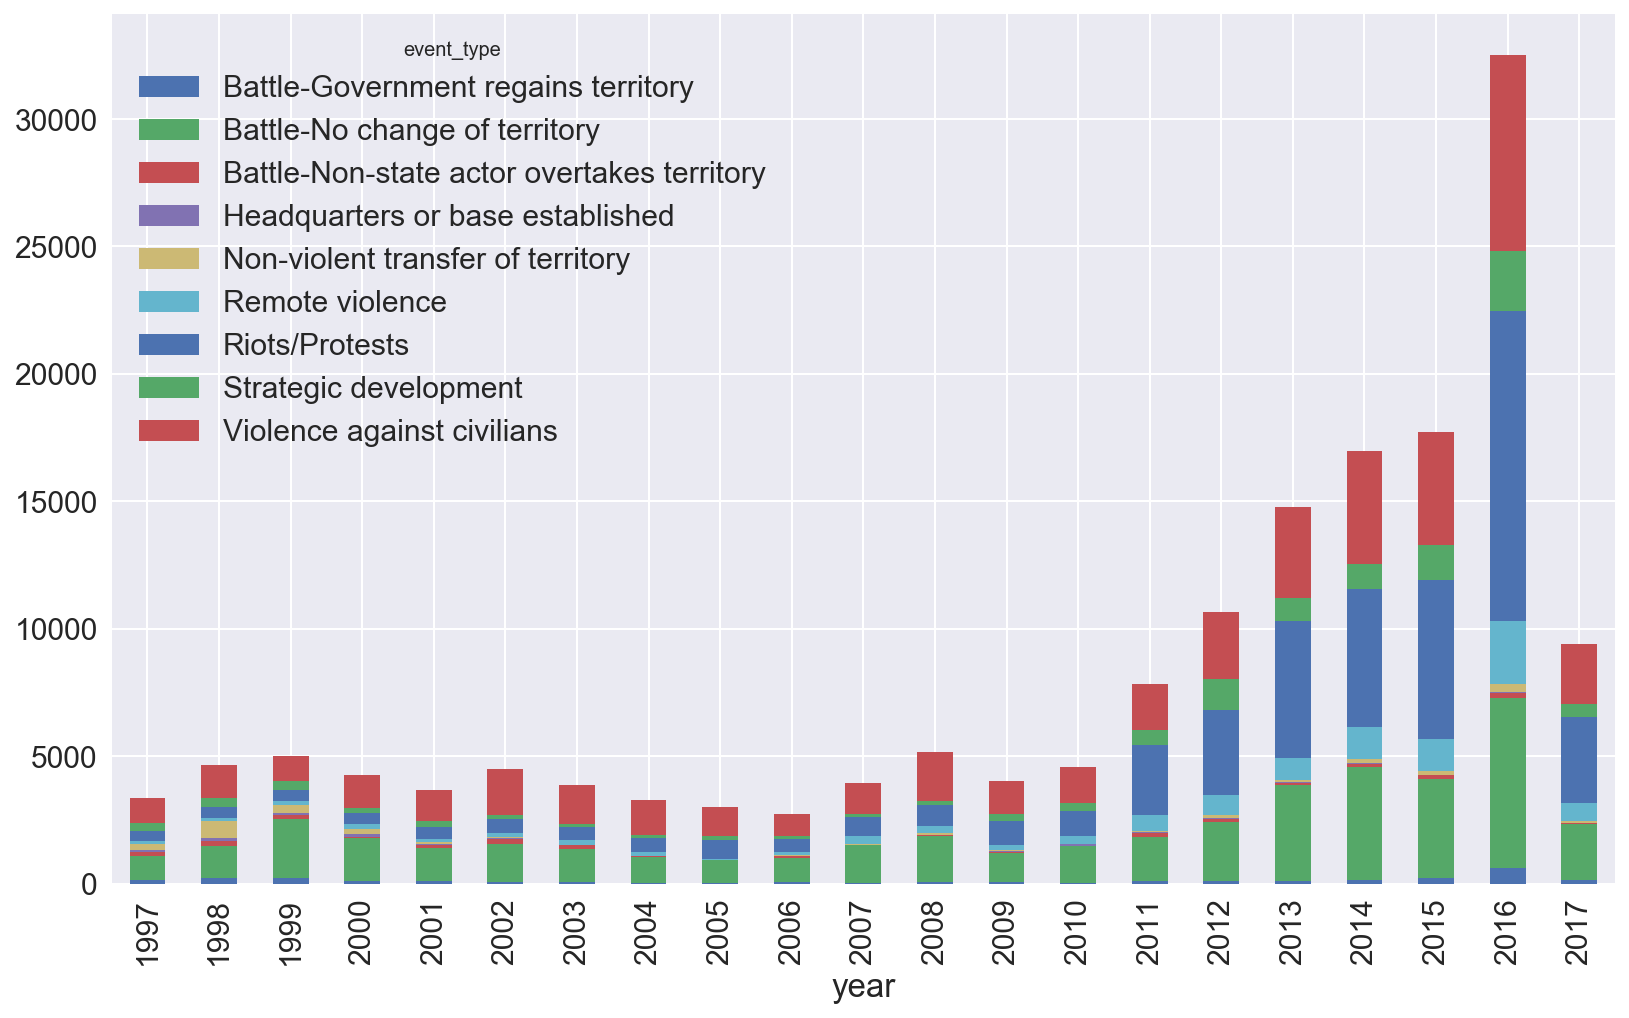

In [37]:
event_type_year.plot(kind='bar', figsize=(12,8), stacked=True)

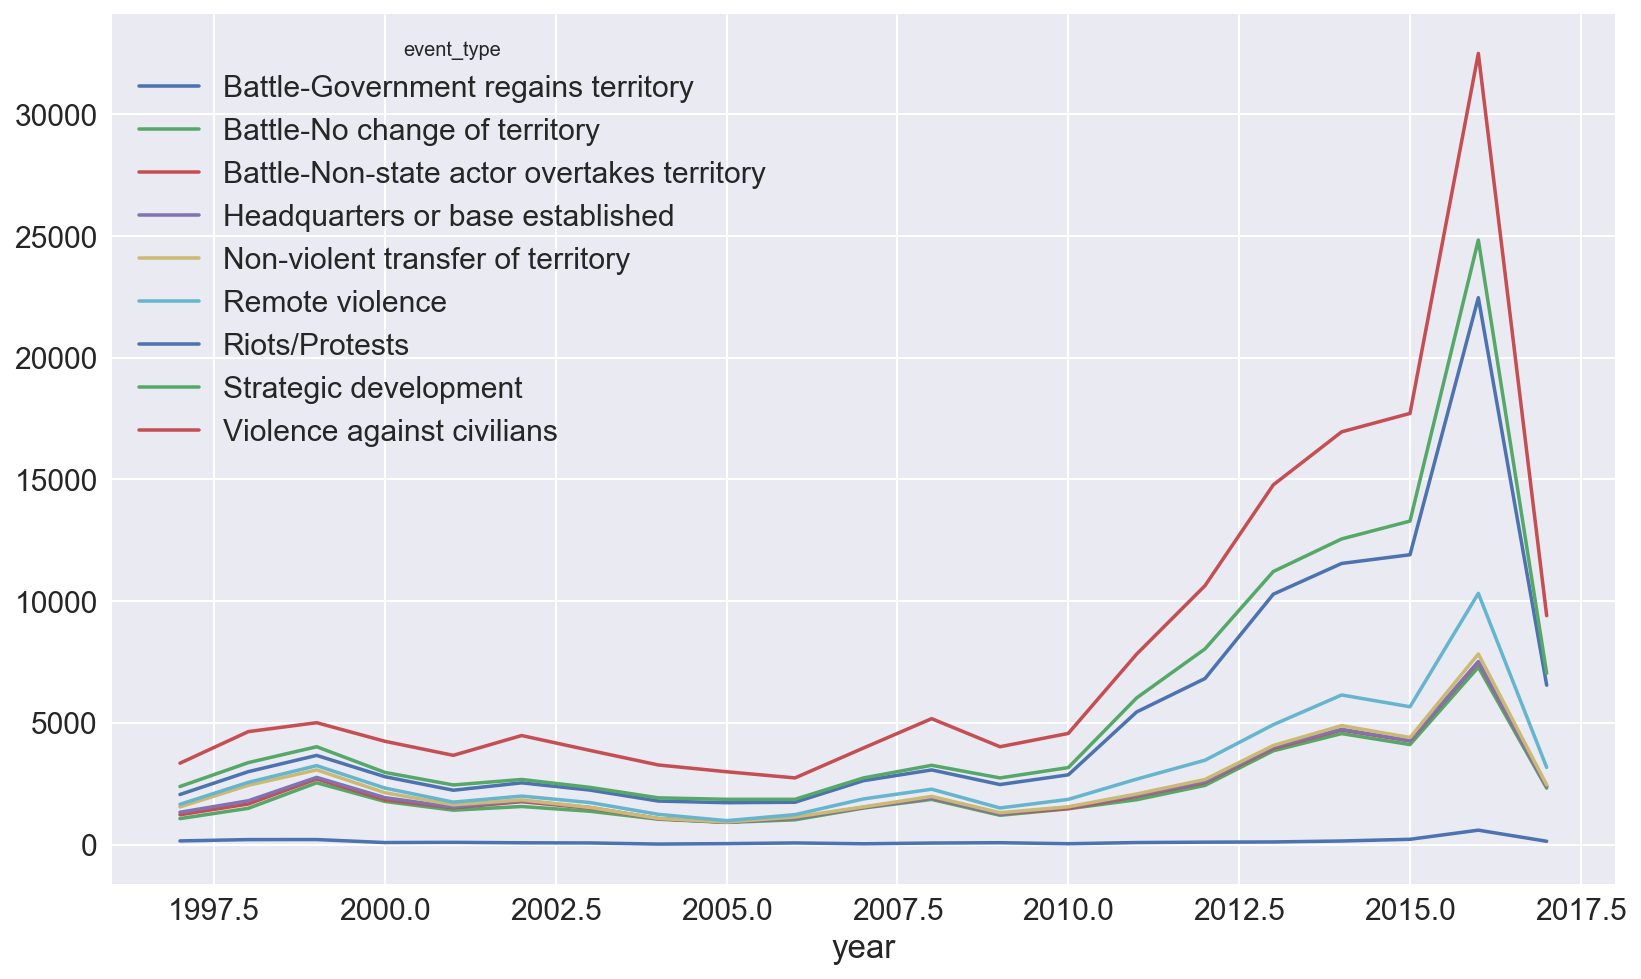

In [38]:
event_type_year.plot(kind='line', figsize=(12,8), stacked=True)

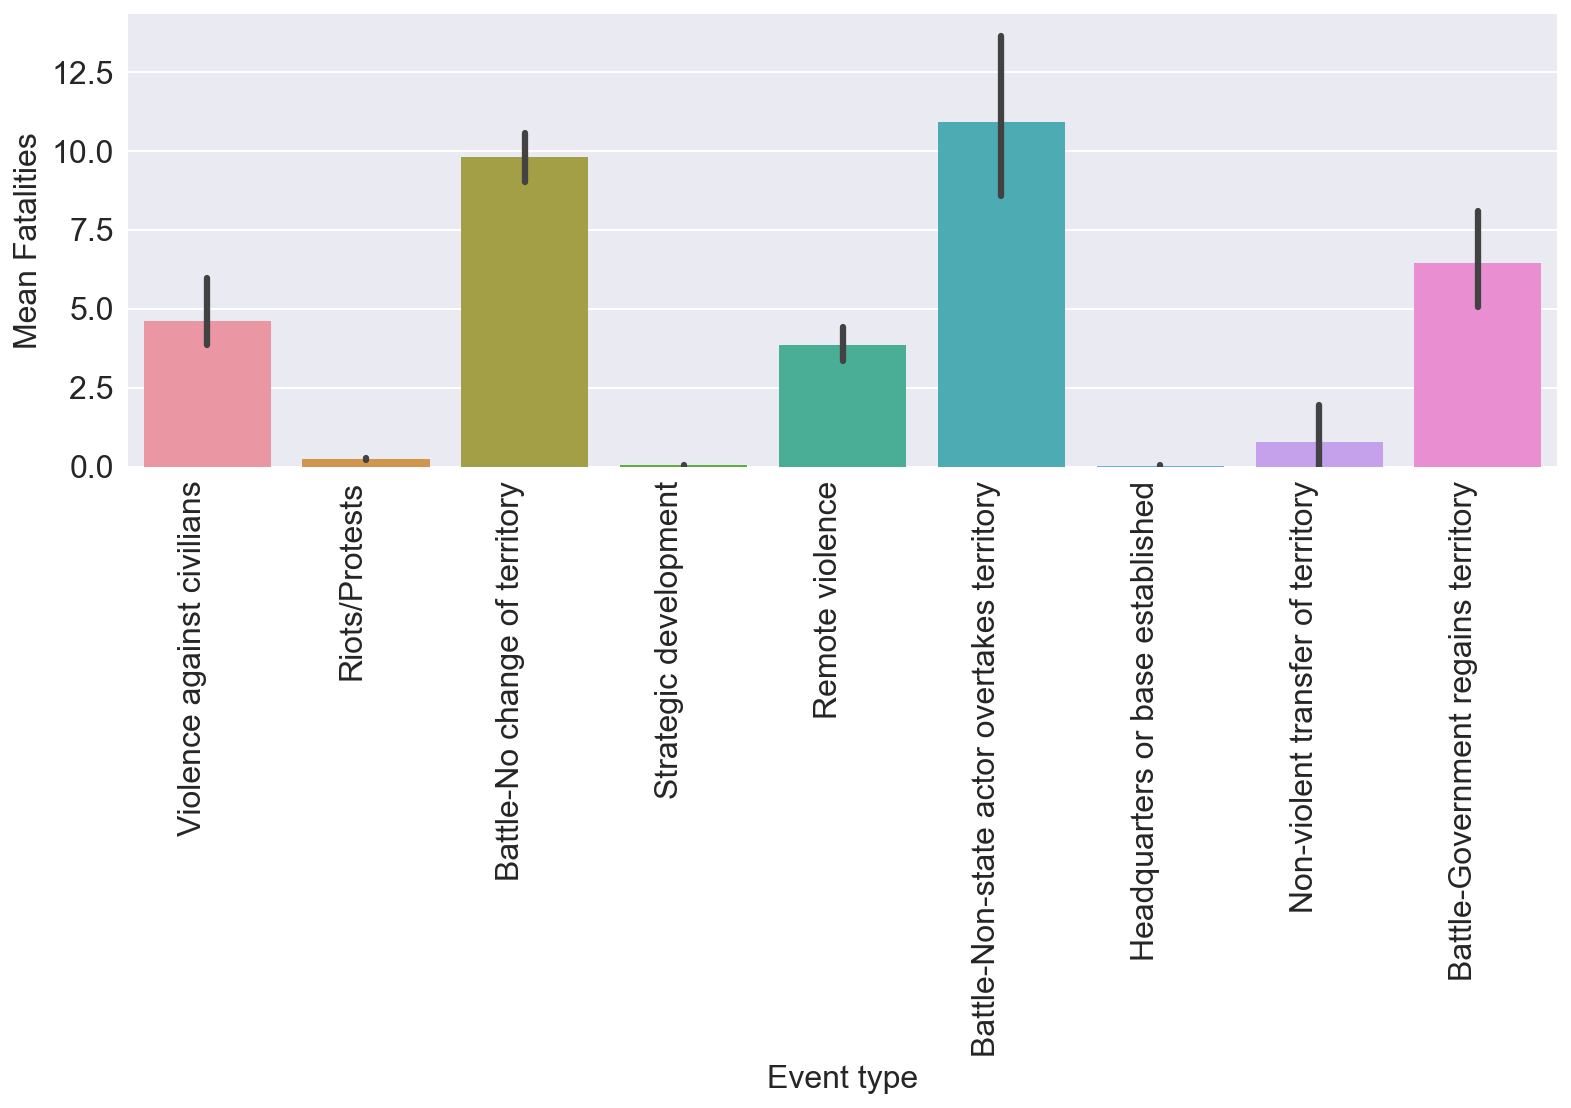

In [39]:
sns.factorplot(x='event_type', y='fatalities', data= conflicts, kind='bar', aspect=3).set_xticklabels(rotation=90, horizontalalignment='right', fontsize=16).set_yticklabels(fontsize=16)
plt.xlabel('Event type', fontsize=16)
plt.ylabel('Mean Fatalities', fontsize=16)
plt.show()

In [40]:
new=conflicts[['country', 'fatalities']]
new=new.groupby(['country']).sum()
new=new.sort_values(by=['fatalities'], ascending=False)

new.head(10)

fatalities
country                                 
Angola                            143881
Sudan                              89288
Eritrea                            79399
Democratic Republic of Congo       79255
Nigeria                            63685
Ethiopia                           51849
Somalia                            43023
South Sudan                        30889
Burundi                            22655
Libya                              19180

In [41]:
new.tail()

fatalities
country                      
Sierra Leone               50
Gabon                      34
Equatorial Guinea          33
Swaziland                  16
Botswana                    2

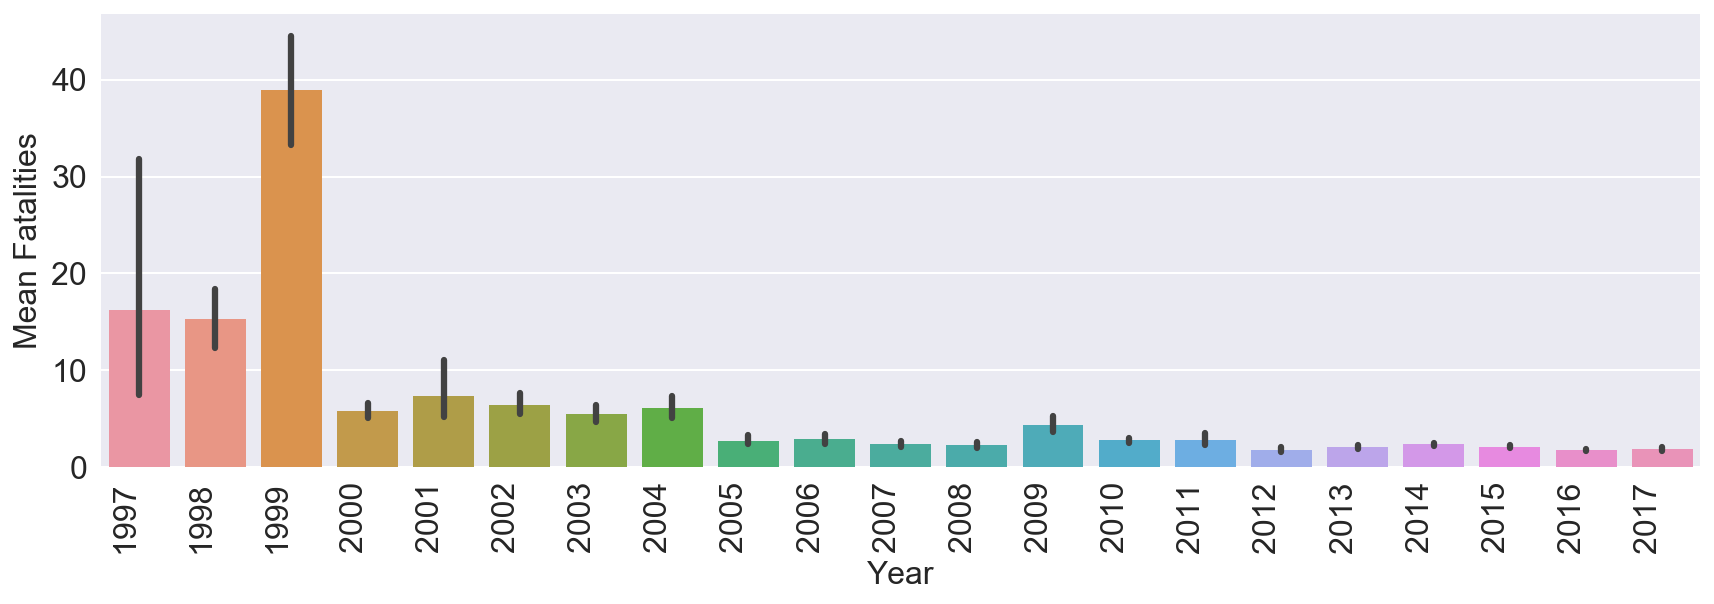

In [42]:
sns.factorplot(x='year', y='fatalities', data= conflicts, kind='bar', aspect=3).set_xticklabels(rotation=90, horizontalalignment='right', fontsize=16).set_yticklabels(fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mean Fatalities', fontsize=16)
plt.show()

**lets look at the interactions between the actors in coflict by trying to map their activities using networks**

In [43]:
import matplotlib.cm as cm
import networkx as nx
from sklearn.preprocessing import MinMaxScaler


In [44]:
df = conflicts[['inter1','inter2']]
df['indicator'] = 1

/Users/alexandra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
df_1 = df.groupby(['inter1','inter2']).count().reset_index()

### Weighted networks

In [46]:
G_w = nx.DiGraph()
G_w.add_nodes_from(range(8))
G_w.add_weighted_edges_from(df_1.values)

In [47]:
print(nx.info(G_w))

Name: 
Type: DiGraph
Number of nodes: 9
Number of edges: 67
Average in degree:   7.4444
Average out degree:   7.4444


In [48]:
nx.adjacency_matrix(G_w).todense()

matrix([[    0,     0,     0,     0,     0,     0,     0,     0,     0],
        [ 2170,  1707, 15033,  9027,   927,   993,  1404, 10275,   370],
        [ 3023,  6266,   545,  1062,   261,     3,     9,  9899,   890],
        [ 2805,  5693,  1359,  2246,   422,    30,    70, 23434,   975],
        [  212,   604,   297,   363,  4331,     7,     4,  5374,    60],
        [ 6515,  6286,    17,   118,    20,  1407,    39,   889,   240],
        [27952,  3370,    15,    72,     7,    36,    89,     0,    69],
        [   23,     3,     1,     2,     0,     0,     0,    11,     0],
        [  853,   659,  3147,   765,    67,    17,    13,   883,    73]],
       dtype=int64)

In [49]:
nx.pagerank(G_w)

{0: 0.23689138852472078,
 1: 0.12296620852777368,
 2: 0.10768894717112877,
 3: 0.08777294799876813,
 4: 0.06504105723834373,
 5: 0.045255186922665315,
 6: 0.04301951982858464,
 7: 0.24430811839174393,
 8: 0.04705662539627082}

In [50]:
positions = nx.circular_layout(G_w)
cmap_edges = cm.get_cmap('rainbow')
edge_weights = [e[2]['weight'] for e in G_w.edges(data=True)]

In [51]:
df_1['min_max_scaled'] = MinMaxScaler().fit_transform(df_1[['indicator']])

In [52]:
df_1.sort_values('min_max_scaled', ascending=False).head(10)

inter1  inter2  indicator  min_max_scaled
45       6       0      27952        1.000000
25       3       7      23434        0.838360
2        1       2      15033        0.537798
7        1       7      10275        0.367572
16       2       7       9899        0.354120
3        1       3       9027        0.322922
36       5       0       6515        0.233051
37       5       1       6286        0.224858
10       2       1       6266        0.224142
19       3       1       5693        0.203642

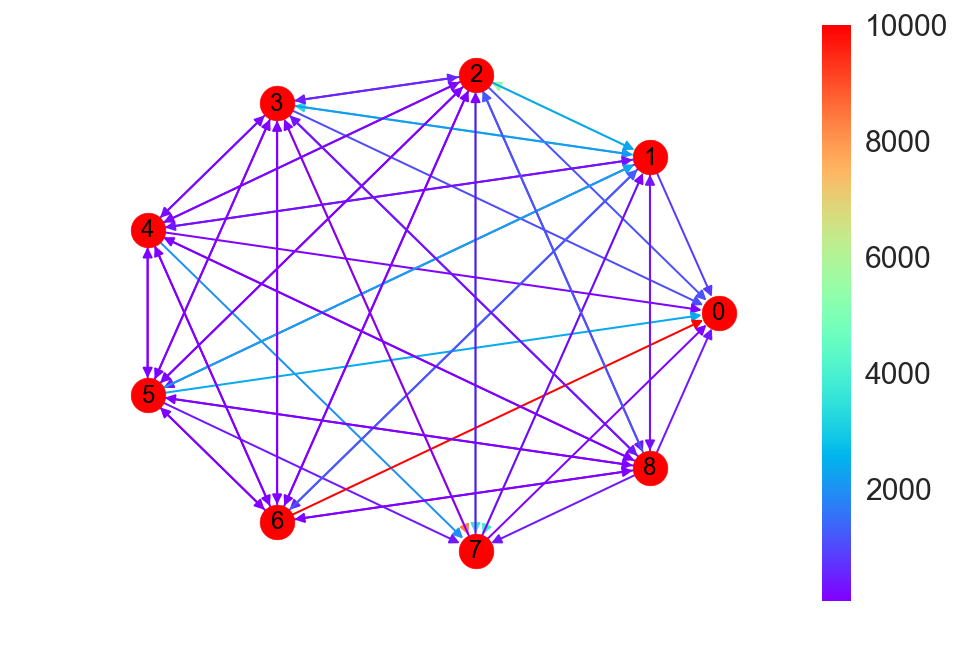

In [53]:
nx.draw_circular(G_w,with_labels=True, edge_color=edge_weights, edge_cmap=cmap_edges)
vmin = 50
vmax = 10000
sm = plt.cm.ScalarMappable(cmap=cmap_edges, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)

plt.show()

This image is quite hard to interpret because with teh exception of node 0 all the others are interacting with each other and we can tell by the arrows that they are attacking each other back and forth. So i will have to simplify this to aid interpretation.

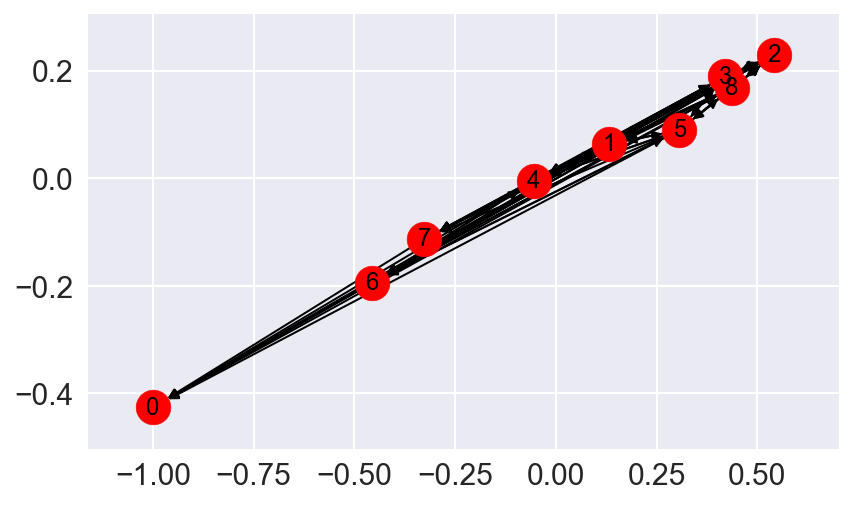

In [54]:
nx.draw_networkx(G_w,with_labels=True)

**Now only looking at the top 20 interactions purely for interpretability**

In [55]:
df_1['min_max_scaled'] = MinMaxScaler().fit_transform(df_1[['indicator']])

In [56]:
df_1.sort_values('min_max_scaled', ascending=False).head(10)

inter1  inter2  indicator  min_max_scaled
45       6       0      27952        1.000000
25       3       7      23434        0.838360
2        1       2      15033        0.537798
7        1       7      10275        0.367572
16       2       7       9899        0.354120
3        1       3       9027        0.322922
36       5       0       6515        0.233051
37       5       1       6286        0.224858
10       2       1       6266        0.224142
19       3       1       5693        0.203642

In [57]:
df_20=df_1.loc[df_1['min_max_scaled']>0.05]

In [58]:
df_20

inter1  inter2  indicator  min_max_scaled
0        1       0       2170        0.077600
1        1       1       1707        0.061035
2        1       2      15033        0.537798
3        1       3       9027        0.322922
6        1       6       1404        0.050195
7        1       7      10275        0.367572
9        2       0       3023        0.108118
10       2       1       6266        0.224142
16       2       7       9899        0.354120
18       3       0       2805        0.100318
19       3       1       5693        0.203642
21       3       3       2246        0.080319
25       3       7      23434        0.838360
31       4       4       4331        0.154914
34       4       7       5374        0.192229
36       5       0       6515        0.233051
37       5       1       6286        0.224858
41       5       5       1407        0.050302
45       6       0      27952        1.000000
46       6       1       3370        0.120532
60       8       2       3147        0.112554

In [59]:
G_20 = nx.DiGraph()
G_20.add_nodes_from(range(8))
G_20.add_weighted_edges_from(df_20.iloc[:,:3].values)

In [60]:
list_20=df_20.min_max_scaled.tolist()
list_20

[0.07760008586454867,
 0.06103538334943294,
 0.5377982898644056,
 0.32292225680655434,
 0.05019498407928161,
 0.3675718221172767,
 0.10811777753926514,
 0.22414224893563736,
 0.35411970949161037,
 0.10031841436800114,
 0.2036420879396086,
 0.08031912990590677,
 0.8383599871203178,
 0.15491395656684911,
 0.19222925834496082,
 0.23305069586061322,
 0.22485778684125793,
 0.05030231476512469,
 1.0,
 0.1205323602017817,
 0.11255411255411256]

In [61]:
type(edge_weights)

list

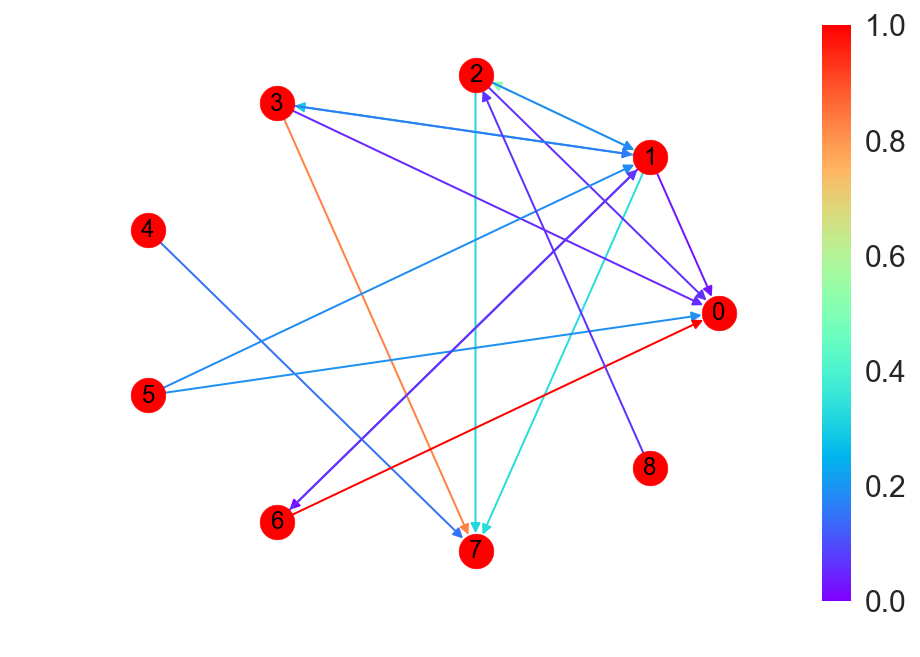

In [62]:
nx.draw_circular(G_20,with_labels=True, edge_color=list_20, edge_cmap=cmap_edges)
vmin = 50
vmax = 10000
sm = plt.cm.ScalarMappable(cmap=cmap_edges)
sm._A = []
plt.colorbar(sm)

plt.show()

In [63]:
density=nx.density(G_w)
print("Network density:", density)

Network density: 0.9305555555555556


 A 0 would mean that there are no connections at all, and a 1 would indicate that all possible edges are present (a perfectly connected network. In my case a density value of 0.93 means this is a very well connected network.

In [64]:
from operator import itemgetter

In [65]:
degree_dict = dict(G_w.degree(G_w.nodes()))
nx.set_node_attributes(G_w, degree_dict, 'degree')

sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
sorted_degree

[(1, 17),
 (2, 17),
 (3, 17),
 (4, 16),
 (5, 16),
 (8, 16),
 (6, 15),
 (7, 12),
 (0, 8)]

## Feature Engineering

Creating new feature based on the number of neighbour each country has

In [66]:
list_a=conflicts['country'].unique().tolist()

In [67]:
len(list_a)

49

In [68]:
list_b=[7, 4, 4, 6, 3, 6, 6, 6, 9, 4, 2, 3, 6, 3, 1, 3, 6, 2, 5, 5, 1, 3, 6, 0, 3, 7, 4, 2, 6, 4, 7, 4, 5, 4, 5, 2, 3, 6, 7, 7, 2, 8, 3, 2, 5, 7, 4, 3, 3]

In [69]:
neighbours=pd.DataFrame({'country': list_a, 'neighbours': list_b})
neighbours.head()

country  neighbours
0       Algeria           7
1        Angola           4
2         Benin           4
3  Burkina Faso           6
4       Burundi           3

In [70]:
conflicts =pd.merge(conflicts, neighbours, on='country', how='left')
print('nulls:', conflicts.neighbours.isnull().sum())

nulls: 0


In [71]:
conflicts.neighbours.describe()

count    165808.000000
mean          4.940130
std           1.974245
min           0.000000
25%           3.000000
50%           5.000000
75%           6.000000
max           9.000000
Name: neighbours, dtype: float64

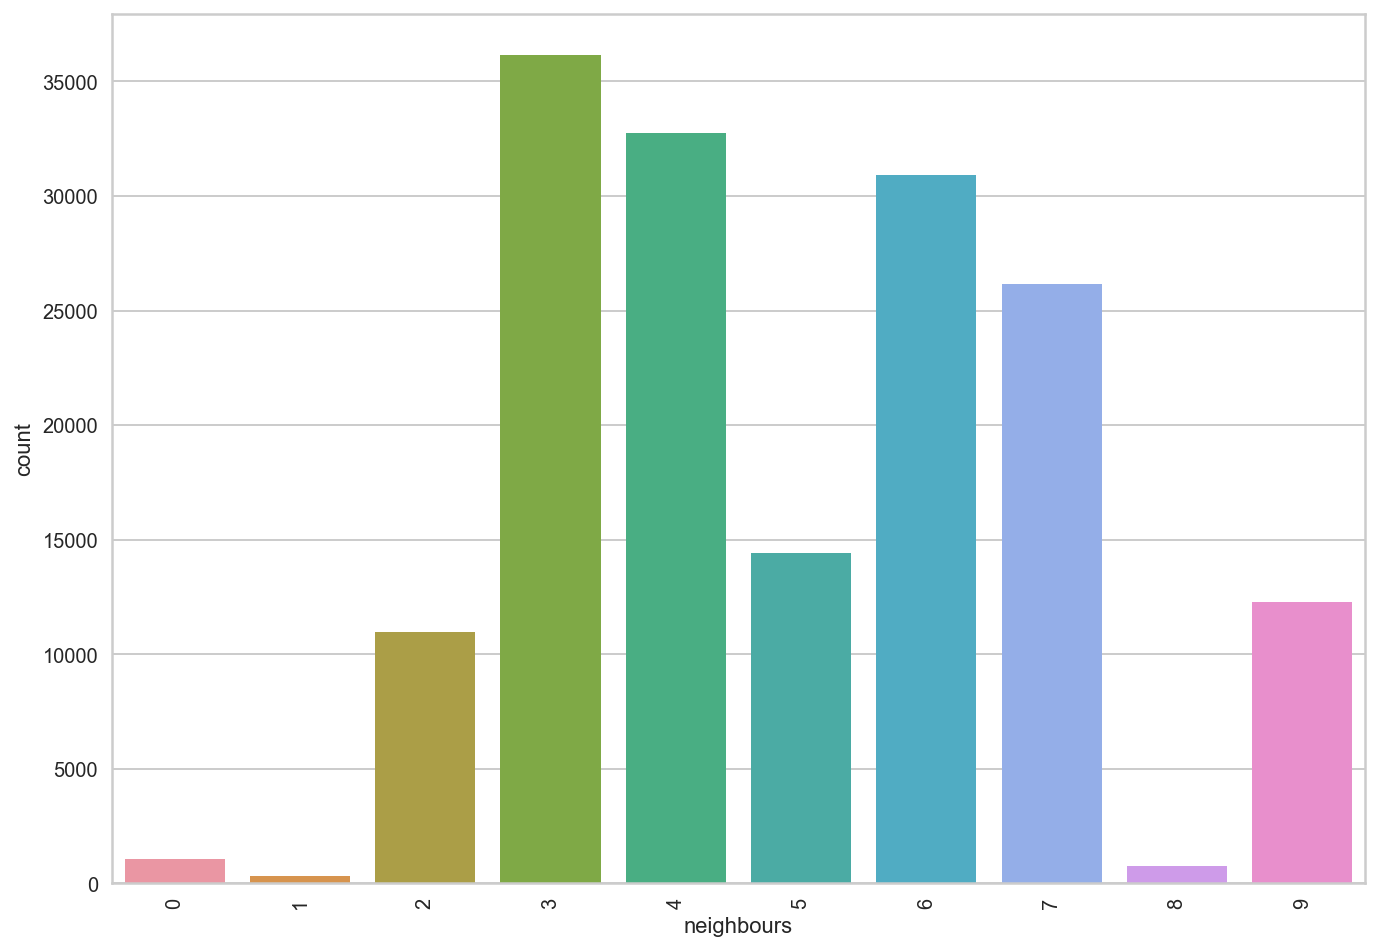

In [251]:
fig, ax = plt.subplots(figsize=(10,8))

sns.countplot(conflicts['neighbours'], label='Count', ax=ax)
plt.xticks(rotation=90)
plt.show()

In [73]:
features=conflicts[['country','year', 'inter1', 'inter2', 'interaction', 'neighbours', 'event_type', 'fatalities']]

In [75]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165808 entries, 0 to 165807
Data columns (total 8 columns):
country        165808 non-null object
year           165808 non-null int64
inter1         165808 non-null int64
inter2         165808 non-null int64
interaction    165808 non-null int64
neighbours     165808 non-null int64
event_type     165808 non-null object
fatalities     165808 non-null int64
dtypes: int64(6), object(2)
memory usage: 16.4+ MB


In [76]:
numerical=features[['neighbours', 'year', 'fatalities']]
type(numerical)

pandas.core.frame.DataFrame

In [77]:
categorical=features[['inter1', 'inter2', 'interaction', 'event_type', 'country']]

In [78]:
categorical.shape

(165808, 5)

In [79]:
categorical=pd.get_dummies(categorical, columns=['inter1', 'inter2', 'interaction', 'event_type', 'country'], drop_first=True)

In [80]:
categorical.shape

(165808, 113)

In [81]:
categorical.head()

inter1_2  inter1_3  inter1_4  inter1_5  inter1_6  inter1_7  inter1_8  \
0         0         0         0         0         0         0         0   
1         0         0         0         1         0         0         0   
2         0         0         0         0         1         0         0   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   inter2_1  inter2_2  inter2_3        ...         country_South Africa  \
0         0         0         0        ...                            0   
1         1         0         0        ...                            0   
2         0         0         0        ...                            0   
3         1         0         0        ...                            0   
4         1         0         0        ...                            0   

   country_South Sudan  country_Sudan  country_Swaziland  country_Tanzania  \
0                    0              0                  0                 0   
1                    0              0                  0                 0   
2                    0              0                  0                 0   
3                    0              0                  0                 0   
4                    0              0                  0                 0   

   country_Togo  country_Tunisia  country_Uganda  country_Zambia  \
0             0                0               0               0   
1             0                0               0               0   
2             0                0               0               0   
3             0                0               0               0   
4             0                0               0               0   

   country_Zimbabwe  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 113 columns]

Okay we've added 108 columns to the dataframe, okay thats not too bad.

In [82]:
features=pd.concat([numerical, categorical], axis=1)
features.head()

neighbours  year  fatalities  inter1_2  inter1_3  inter1_4  inter1_5  \
0           7  2001           1         0         0         0         0   
1           7  2001           0         0         0         0         1   
2           7  2001           0         0         0         0         0   
3           7  2001           0         0         0         0         1   
4           7  2001           0         0         0         0         1   

   inter1_6  inter1_7  inter1_8        ...         country_South Africa  \
0         0         0         0        ...                            0   
1         0         0         0        ...                            0   
2         1         0         0        ...                            0   
3         0         0         0        ...                            0   
4         0         0         0        ...                            0   

   country_South Sudan  country_Sudan  country_Swaziland  country_Tanzania  \
0                    0              0                  0                 0   
1                    0              0                  0                 0   
2                    0              0                  0                 0   
3                    0              0                  0                 0   
4                    0              0                  0                 0   

   country_Togo  country_Tunisia  country_Uganda  country_Zambia  \
0             0                0               0               0   
1             0                0               0               0   
2             0                0               0               0   
3             0                0               0               0   
4             0                0               0               0   

   country_Zimbabwe  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 116 columns]

In [83]:
import sys

In [84]:
print(sys.getsizeof(features))

29285064


In [85]:
features_small=features.sample(frac=0.2, random_state=1) #random state for reproducibility

In [86]:
print(sys.getsizeof(features_small))

4808514


In [86]:
correlations_f=features.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
correlations_f

In [87]:
median_fatal=np.median(features.fatalities)
median_fatal

0.0

In [88]:
mean_fatal=np.mean(features.fatalities)
mean_fatal

4.420257164913635

In [89]:
features_small['deadly']=[1 if i > median_fatal else 0 for i in features_small.fatalities]

In [90]:
features_small['deadly'].value_counts()

0    22639
1    10523
Name: deadly, dtype: int64

In [91]:
target=features_small.deadly

In [92]:
#  Baseline using the smaller dataset
1-features_small['deadly'].mean()

0.6826789699053133

In [93]:
#Baseline calculated with the full dataset:
baseline=(56660/(56660+26244))
print('Baseline Accuracy: ', baseline)

Baseline Accuracy:  0.6834410884878896


This is the baseline calculated assuming the whole dataset. We get the exact same value so the random sample is representative of dataset.

baseline=(113321/(113321+52487))
print('Baseline Accuracy: ', baseline)

I'm not using the fatalities for obvious reasons so i will drop them at this stage.

In [94]:
features_small.drop(['fatalities', 'deadly'], axis=1, inplace=True)

In [95]:
features_small.shape

(33162, 115)

In [96]:
features_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33162 entries, 148345 to 98715
Columns: 115 entries, neighbours to country_Zimbabwe
dtypes: int64(2), uint8(113)
memory usage: 4.3 MB


In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
categorical_ss= scaler.fit_transform(features_small)

In [98]:
from sklearn.model_selection import train_test_split
f_train, f_test, t_train, t_test = train_test_split(features_small, target, random_state=1)

### Feature Selection

At this stage, running the models are taking an inordinate amount of time (time i no longer have to spend) so in order to carry out the ML part of the project im going to randomly resamople the data.

https://machinelearningmastery.com/feature-selection-to-improve-accuracy-and-decrease-training-time/

In [99]:
import sys
from yellowbrick.features import Rank1D

Method 1:

In [100]:
from yellowbrick.features import Rank1D

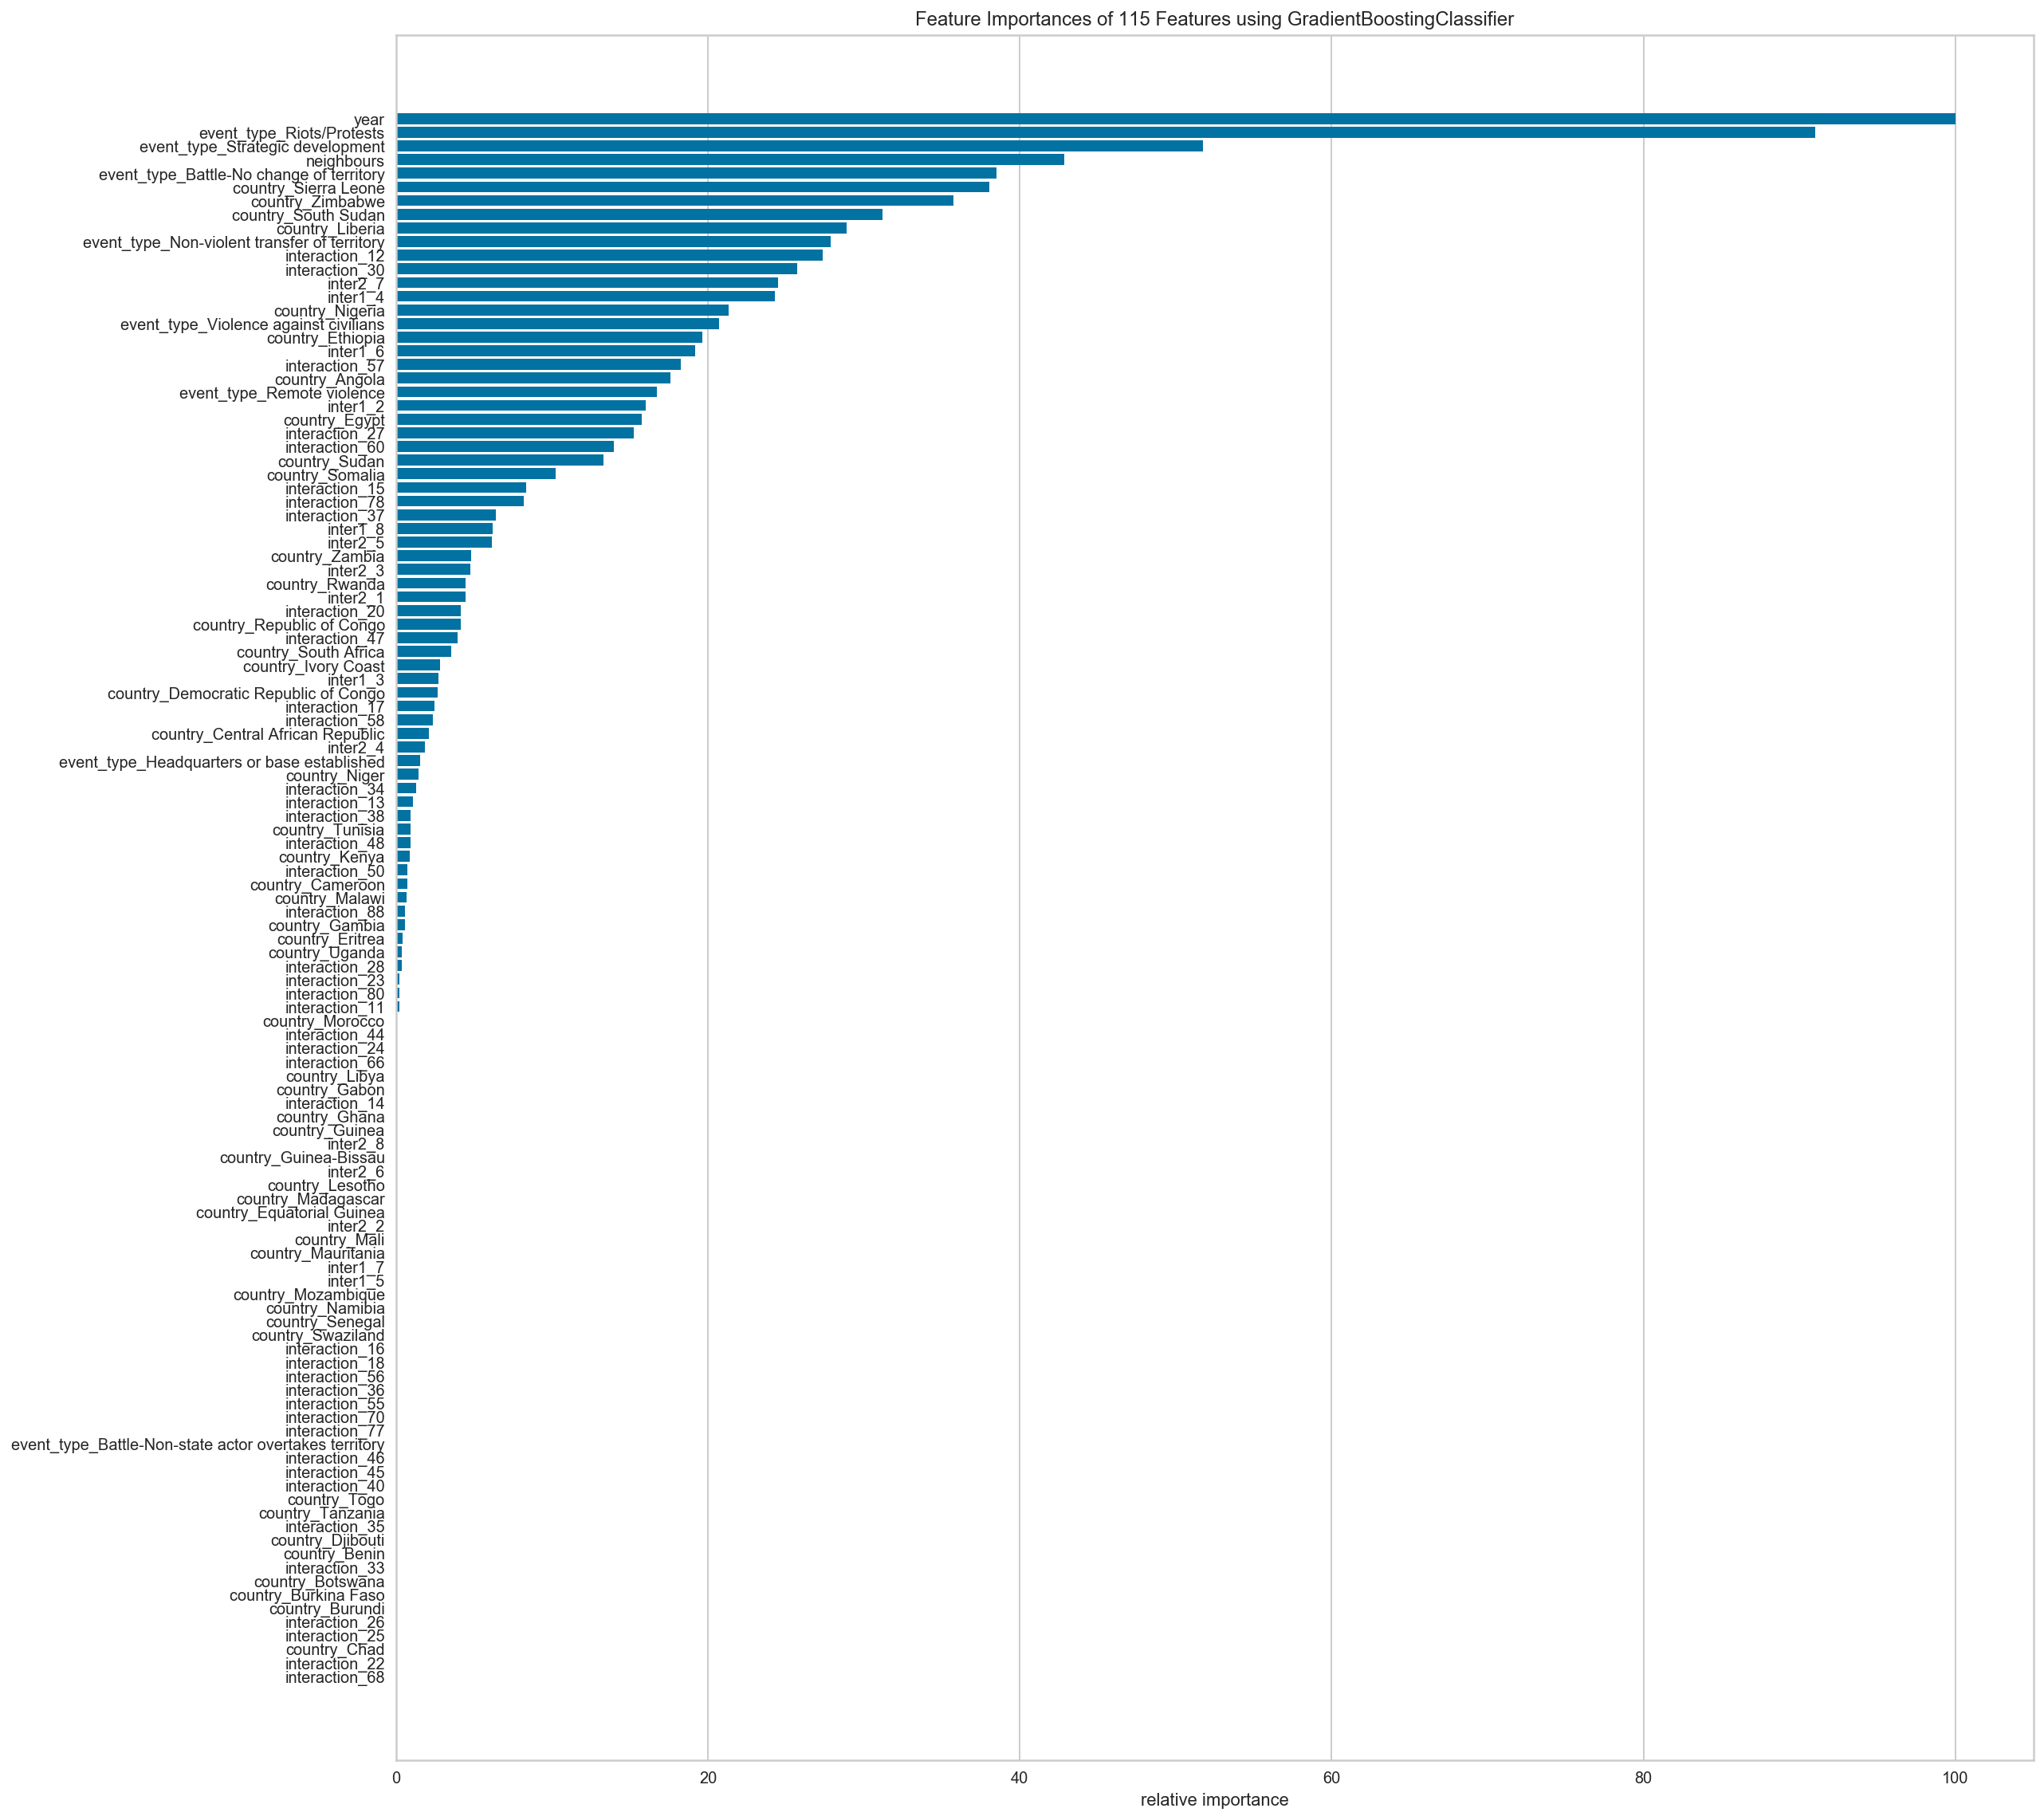

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

from yellowbrick.features.importances import FeatureImportances

# Create a new matplotlib figure
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot()

viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
viz.fit(f_train, t_train)
viz.poof()


Okay, a little side-note. I tried different techniques to identify the features to drop and they generally agreed. the one that intuitevely made the most sense was this first method because it identifies the weakest features as small countries with few events and the interactions which are a poor feature so I'm happy to drop them.
The section below is the removal of the weakest features.

In [102]:
feat_2 = pd.DataFrame({'feature':viz.features_,'importance':viz.feature_importances_})
feat_2.set_index('feature',inplace=True)

In [103]:
feat_2.sort_values('importance', ascending=False)

importance
feature                                                 
year                                          100.000000
event_type_Riots/Protests                      91.031089
event_type_Strategic development               51.740244
neighbours                                     42.834958
event_type_Battle-No change of territory       38.523412
country_Sierra Leone                           38.038967
country_Zimbabwe                               35.745965
country_South Sudan                            31.185549
country_Liberia                                28.916007
event_type_Non-violent transfer of territory   27.885365
interaction_12                                 27.363399
interaction_30                                 25.747466
inter2_7                                       24.502753
inter1_4                                       24.314548
country_Nigeria                                21.300365
event_type_Violence against civilians          20.709891
country_Ethiopia                               19.658244
inter1_6                                       19.197178
interaction_57                                 18.257646
country_Angola                                 17.605785
event_type_Remote violence                     16.730562
inter1_2                                       15.984975
country_Egypt                                  15.756518
interaction_27                                 15.221322
interaction_60                                 13.948171
country_Sudan                                  13.305024
country_Somalia                                10.236073
interaction_15                                  8.319370
interaction_78                                  8.191345
interaction_37                                  6.374815
...                                                  ...
interaction_18                                  0.000000
country_Burkina Faso                            0.000000
country_Burundi                                 0.000000
interaction_26                                  0.000000
interaction_25                                  0.000000
country_Chad                                    0.000000
interaction_56                                  0.000000
inter1_5                                        0.000000
interaction_16                                  0.000000
country_Swaziland                               0.000000
interaction_66                                  0.000000
country_Libya                                   0.000000
country_Gabon                                   0.000000
interaction_14                                  0.000000
country_Ghana                                   0.000000
country_Guinea                                  0.000000
inter2_8                                        0.000000
country_Guinea-Bissau                           0.000000
inter2_6                                        0.000000
country_Lesotho                                 0.000000
country_Madagascar                              0.000000
country_Equatorial Guinea                       0.000000
inter2_2                                        0.000000
country_Mali                                    0.000000
country_Mauritania                              0.000000
inter1_7                                        0.000000
country_Mozambique                              0.000000
country_Namibia                                 0.000000
country_Senegal                                 0.000000
interaction_68                                  0.000000

[115 rows x 1 columns]

In [104]:
to_exclude_1 = feat_2.loc[feat_2['importance']<1]

In [105]:
to_exclude_1.shape

(64, 1)

In [106]:
drop_list=list(to_exclude_1.T)

In [107]:
drop_list

['interaction_68',
 'interaction_22',
 'country_Chad',
 'interaction_25',
 'interaction_26',
 'country_Burundi',
 'country_Burkina Faso',
 'country_Botswana',
 'interaction_33',
 'country_Benin',
 'country_Djibouti',
 'interaction_35',
 'country_Tanzania',
 'country_Togo',
 'interaction_40',
 'interaction_45',
 'interaction_46',
 'event_type_Battle-Non-state actor overtakes territory',
 'interaction_77',
 'interaction_70',
 'interaction_55',
 'interaction_36',
 'interaction_56',
 'interaction_18',
 'interaction_16',
 'country_Swaziland',
 'country_Senegal',
 'country_Namibia',
 'country_Mozambique',
 'inter1_5',
 'inter1_7',
 'country_Mauritania',
 'country_Mali',
 'inter2_2',
 'country_Equatorial Guinea',
 'country_Madagascar',
 'country_Lesotho',
 'inter2_6',
 'country_Guinea-Bissau',
 'inter2_8',
 'country_Guinea',
 'country_Ghana',
 'interaction_14',
 'country_Gabon',
 'country_Libya',
 'interaction_66',
 'interaction_24',
 'interaction_44',
 'country_Morocco',
 'interaction_11',
 

Method 2:

In [108]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(f_train, t_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 1 (0.266079)
2. feature 64 (0.064878)
3. feature 59 (0.052832)
4. feature 65 (0.047424)
5. feature 6 (0.043355)
6. feature 51 (0.041104)
7. feature 66 (0.037879)
8. feature 114 (0.029572)
9. feature 0 (0.025797)
10. feature 15 (0.024428)
11. feature 103 (0.022329)
12. feature 4 (0.017551)
13. feature 63 (0.013121)
14. feature 5 (0.012233)
15. feature 104 (0.012144)
16. feature 99 (0.012056)
17. feature 107 (0.011405)
18. feature 18 (0.011328)
19. feature 44 (0.011006)
20. feature 106 (0.010639)
21. feature 80 (0.010620)
22. feature 75 (0.009383)
23. feature 62 (0.008011)
24. feature 33 (0.007822)
25. feature 2 (0.007670)
26. feature 77 (0.006761)
27. feature 89 (0.006761)
28. feature 46 (0.006666)
29. feature 3 (0.006320)
30. feature 10 (0.005874)
31. feature 105 (0.005819)
32. feature 19 (0.005641)
33. feature 12 (0.005640)
34. feature 31 (0.005559)
35. feature 71 (0.005387)
36. feature 73 (0.005376)
37. feature 38 (0.005312)
38. feature 9 (0.004960)
39. fe

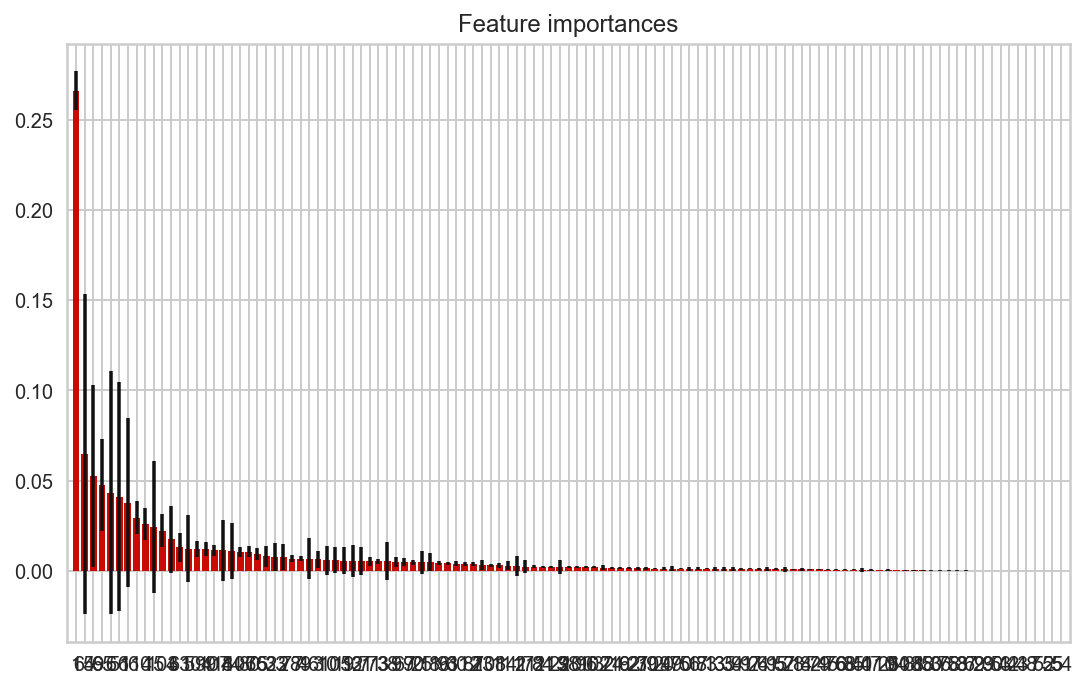

In [109]:
print("Feature ranking:")

for f in range(f_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(f_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(f_train.shape[1]), indices)
plt.xlim([-1, f_train.shape[1]])
plt.show()

In [110]:
features_ET = pd.DataFrame({'variable':features_small.columns,
              'feature_importance':importances})


In [111]:
result= features_ET.sort_values('feature_importance', ascending=False)
result

feature_importance                                      variable
1              0.266079                                          year
64             0.064878                     event_type_Riots/Protests
59             0.052832      event_type_Battle-No change of territory
65             0.047424              event_type_Strategic development
6              0.043355                                      inter1_6
51             0.041104                                interaction_60
66             0.037879         event_type_Violence against civilians
114            0.029572                              country_Zimbabwe
0              0.025797                                    neighbours
15             0.024428                                      inter2_7
103            0.022329                          country_Sierra Leone
4              0.017551                                      inter1_4
63             0.013121                    event_type_Remote violence
5              0.012233                                      inter1_5
104            0.012144                               country_Somalia
99             0.012056                               country_Nigeria
107            0.011405                                 country_Sudan
18             0.011328                                interaction_12
44             0.011006                                interaction_47
106            0.010639                           country_South Sudan
80             0.010620                              country_Ethiopia
75             0.009383          country_Democratic Republic of Congo
62             0.008011  event_type_Non-violent transfer of territory
33             0.007822                                interaction_30
2              0.007670                                      inter1_2
77             0.006761                                 country_Egypt
89             0.006761                               country_Liberia
46             0.006666                                interaction_50
3              0.006320                                      inter1_3
10             0.005874                                      inter2_2
..                  ...                                           ...
82             0.000804                                country_Gambia
79             0.000797                               country_Eritrea
45             0.000746                                interaction_48
76             0.000667                              country_Djibouti
68             0.000647                                 country_Benin
85             0.000604                         country_Guinea-Bissau
40             0.000565                                interaction_40
47             0.000531                                interaction_55
110            0.000509                                  country_Togo
26             0.000499                                interaction_22
94             0.000431                            country_Mauritania
108            0.000344                             country_Swaziland
81             0.000272                                 country_Gabon
88             0.000270                               country_Lesotho
50             0.000219                                interaction_58
36             0.000214                                interaction_35
78             0.000197                     country_Equatorial Guinea
58             0.000158                                interaction_88
37             0.000139                                interaction_36
69             0.000077                              country_Botswana
29             0.000070                                interaction_25
30             0.000055                                interaction_26
53             0.000053                                interaction_68
42             0.000052                                interaction_45
43             0.000050                                interaction_46
48             

Method 3:

I tried RFE but its taking an inordinate amount of time to run so i'm including the code (which should work) but i have commented it out to avoid running it.

In [112]:
# from sklearn.svm import LinearSVC
# from sklearn.feature_selection import RFE
# svm = LinearSVC()

# rfe = RFE(svm, 10)
# rfe = rfe.fit(f_train, t_train)

# print(rfe.support_)
# print(rfe.ranking_)

In [113]:
# names=features_small.columns
# print('Features sorted by their rank:') #"Features sorted by their rank:"

# print(sorted(zip(map(lambda x: round(x,4), rfe.ranking_), names)))


Okay so now i drop the columns i have selected using drop_list

In [114]:
data=features_small.drop(drop_list, axis=1)
data.shape

(33162, 51)

In [115]:
target.shape

(33162,)

### Modelling

Do a split of data on the new dataset.

In [116]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [117]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.75


In [118]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.84
Accuracy of Decision Tree classifier on test set: 0.77


In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.76


In [120]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.75
Accuracy of LDA classifier on test set: 0.75


In [121]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.69
Accuracy of GNB classifier on test set: 0.68


In [124]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.77
Accuracy of SVM classifier on test set: 0.76


In [125]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

nnet = MLPClassifier(hidden_layer_sizes=5,solver='lbfgs',activation='identity',max_iter=1000,random_state=1)
nnet.fit(X_train,y_train)
metrics.mean_squared_error(y_test,nnet.predict(X_test))
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(nnet.score(X_train, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(nnet.score(X_test, y_test)))

Accuracy of NN classifier on training set: 0.68
Accuracy of NN classifier on test set: 0.68


In [126]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.84
Accuracy of RF classifier on test set: 0.77


# GridSearchCV for top 3 models

## First up is KNN - My best performer :)

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [10, 15, 25]}]

# knn_clf = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=10, weights=uniform .................................
[CV] n_neighbors=10, weights=uniform .................................
[CV] n_neighbors=10, weights=uniform .................................
[CV] n_neighbors=10, weights=uniform .................................
[CV]  n_neighbors=10, weights=uniform, score=0.7700502512562815, total=   1.4s
[CV] n_neighbors=10, weights=uniform .................................
[CV]  n_neighbors=10, weights=uniform, score=0.7573869346733668, total=   1.4s
[CV]  n_neighbors=10, weights=uniform, score=0.7710092480900683, total=   1.4s
[CV] n_neighbors=10, weights=distance ................................
[CV] n_neighbors=10, weights=distance ................................
[CV]  n_neighbors=10, weights=uniform, score=0.7533172496984318, total=   1.3s
[CV] n_neighbors=10, weights=distance ................................
[CV]  n_neighbors=10, weights=distance, score=0.77246231

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   54.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [10, 15, 25]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [129]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(grid_search_knn.best_estimator_, X_test, y_test))

0.7564823151495914

In [130]:
final_classifier = grid_search_knn.best_estimator_.fit(X_test, y_test)
final_classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='distance')

In [131]:
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(final_classifier.score(X_test, y_test)))

Accuracy of K-NN classifier on test set: 0.87


In [132]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = final_classifier.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5289  371]
 [ 682 1949]]
             precision    recall  f1-score   support

          0       0.89      0.93      0.91      5660
          1       0.84      0.74      0.79      2631

avg / total       0.87      0.87      0.87      8291



conda install -c conda-forge scikit-plot 

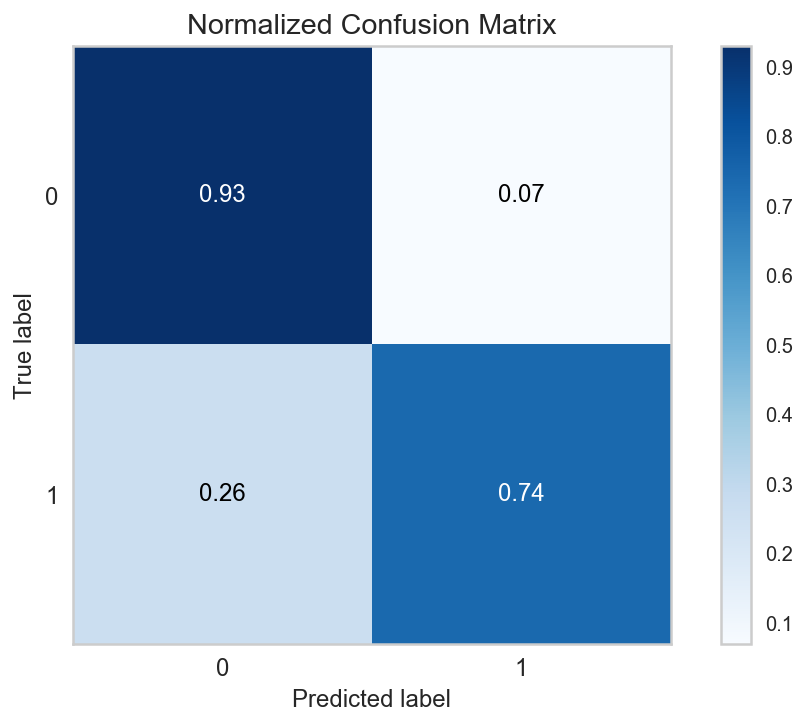

In [133]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)
plt.show()

In [134]:
from sklearn import metrics

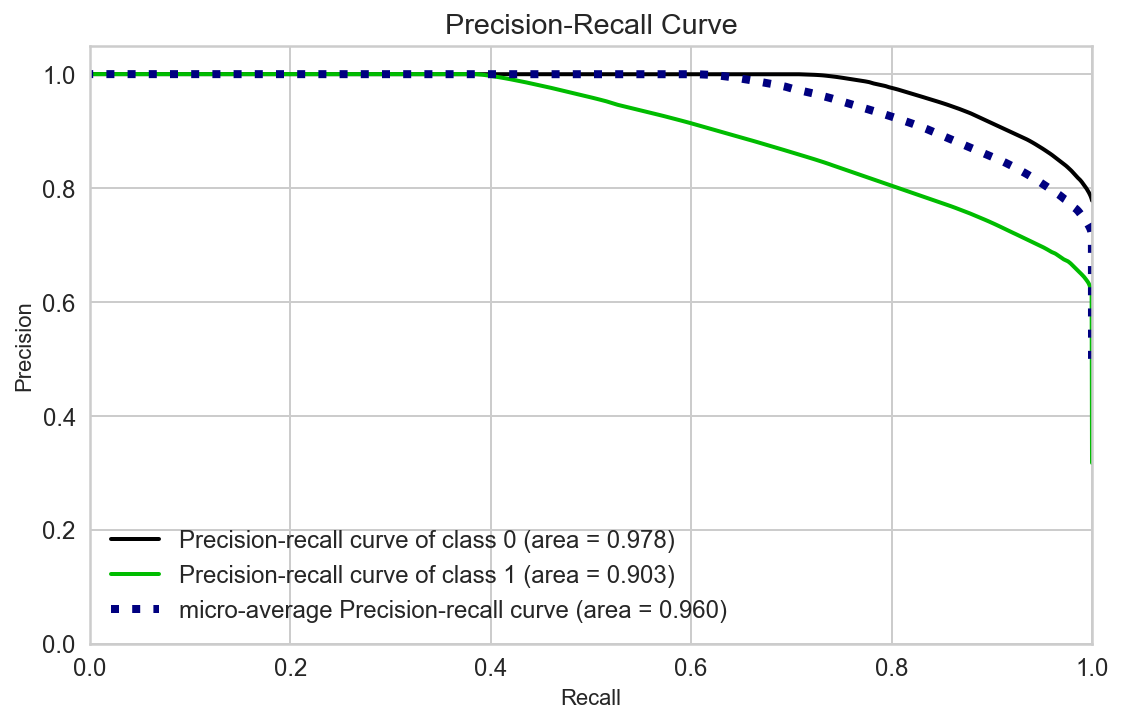

In [135]:
y_probas = final_classifier.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

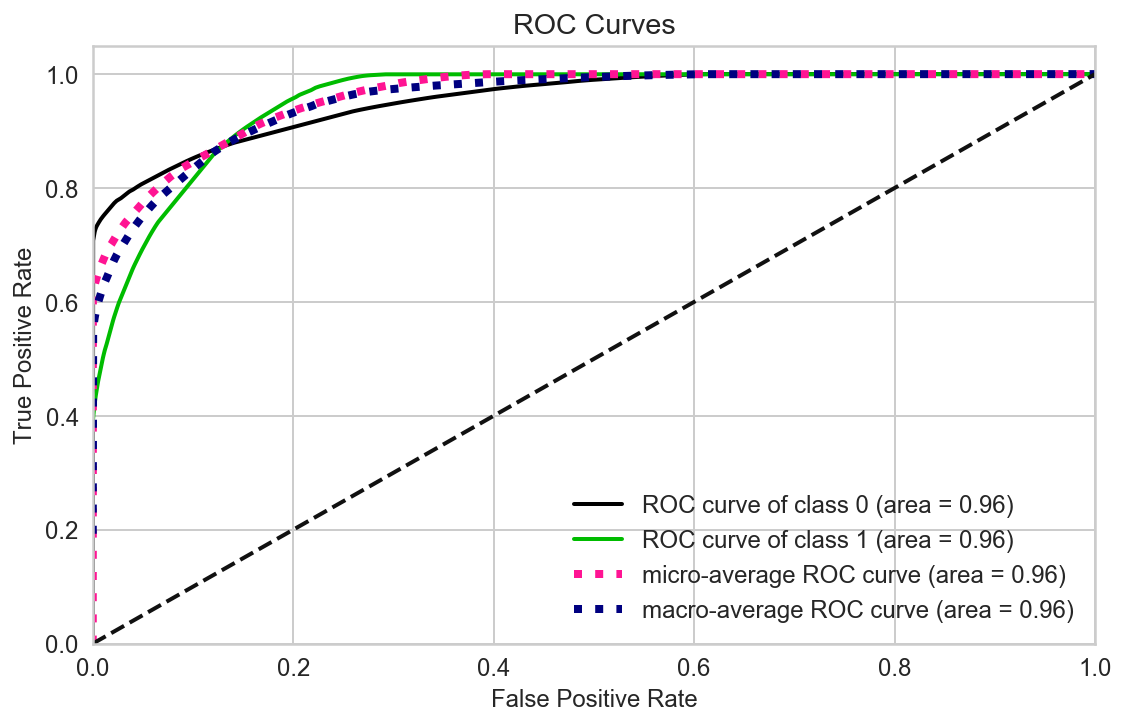

In [136]:
y_probas = final_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

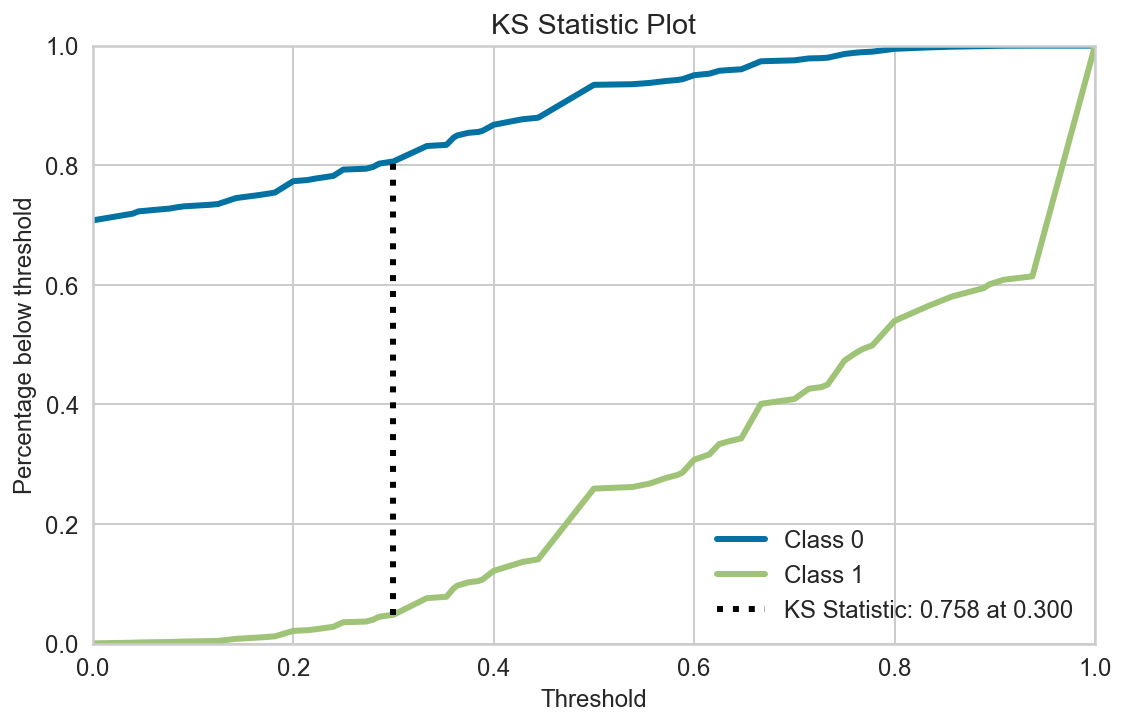

In [137]:
y_probas = final_classifier.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test, y_probas)
plt.show()

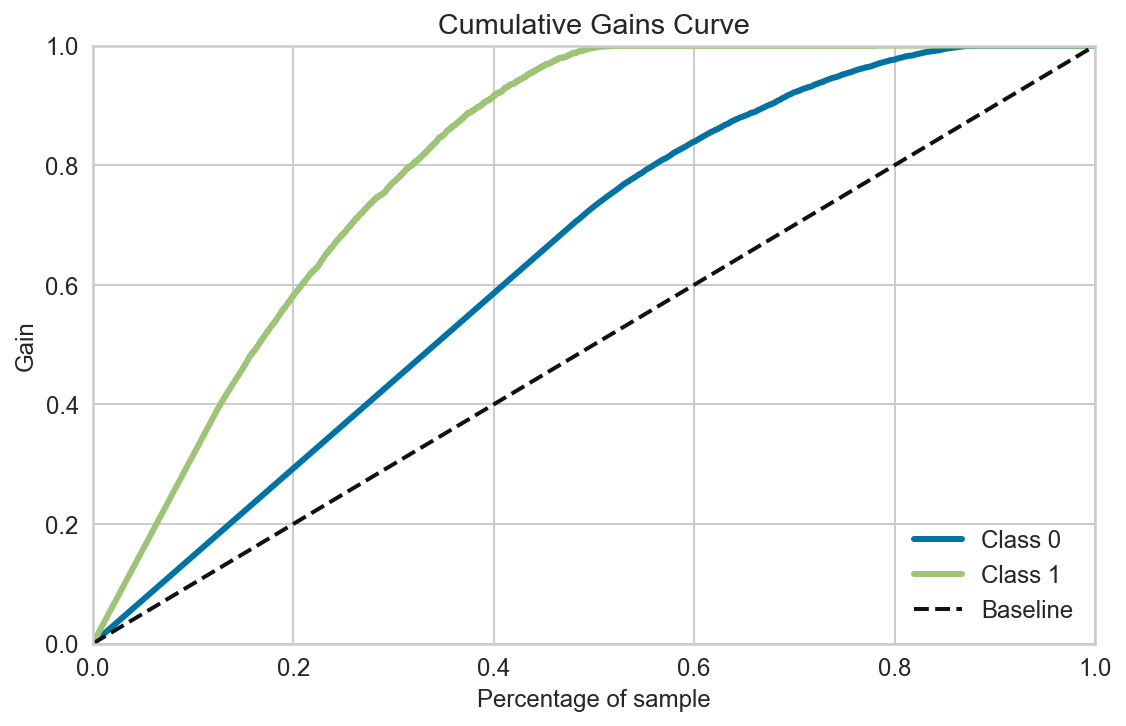

In [138]:
y_probas = final_classifier.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

http://mlwiki.org/index.php/Cumulative_Gain_Chart

## Next up is SVC

In [ ]:
param_grid_svm = [{'kernel':('linear', 'rbf'), 'C': [1, 10, ]}]
grid_search_svc=GridSearchCV(svm, param_grid_svm, cv=5, verbose=3)
grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.7495477386934674, total= 2.7min
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min remaining:    0.0s


[CV] ...... C=1, kernel=linear, score=0.737286432160804, total= 2.9min
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.9min remaining:    0.0s


In [ ]:
np.mean(cross_val_score(grid_search_svc.best_estimator_, X_test, y_test))

In [ ]:
final_classifier_svc = grid_search_svc.best_estimator_.fit(X_test, y_test)
final_classifier_svc

In [ ]:
print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(final_classifier_svc.score(X_test, y_test)))

In [ ]:
pred_svc = final_classifier_svc.predict(X_test)
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)
plt.show()

y_probas_svc = final_classifier_svc.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas_svc)
plt.show()
AttributeError: predict_proba is not available when  probability=False
https://github.com/scikit-learn/scikit-learn/issues/4791

In [ ]:
# y_probas_svc = final_classifier_svc.predict_proba(X_test)
# skplt.metrics.plot_precision_recall(y_test, y_probas_svc)
# plt.show()

In [ ]:
# skplt.metrics.plot_ks_statistic(y_test, y_probas)
# plt.show()

In [ ]:
# y_probas = final_classifier_svc.predict_proba(X_test)
# skplt.metrics.plot_cumulative_gain(y_test, y_probas)
# plt.show()

# And now Random Forest

In [139]:
param_grid = { 
    'n_estimators': [100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40]
}

CV_rfc = GridSearchCV(rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [140]:
# print CV_rfc.best_params_

In [141]:
np.mean(cross_val_score(CV_rfc.best_estimator_, X_test, y_test))

0.7662527308086545

In [142]:
final_classifier_rf = CV_rfc.best_estimator_.fit(X_test, y_test)
final_classifier_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [143]:
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(final_classifier_rf.score(X_test, y_test)))

Accuracy of RF classifier on test set: 0.87


In [146]:
pred_rf = final_classifier_rf.predict(X_test)
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

[[5152  508]
 [ 602 2029]]
             precision    recall  f1-score   support

          0       0.90      0.91      0.90      5660
          1       0.80      0.77      0.79      2631

avg / total       0.87      0.87      0.87      8291



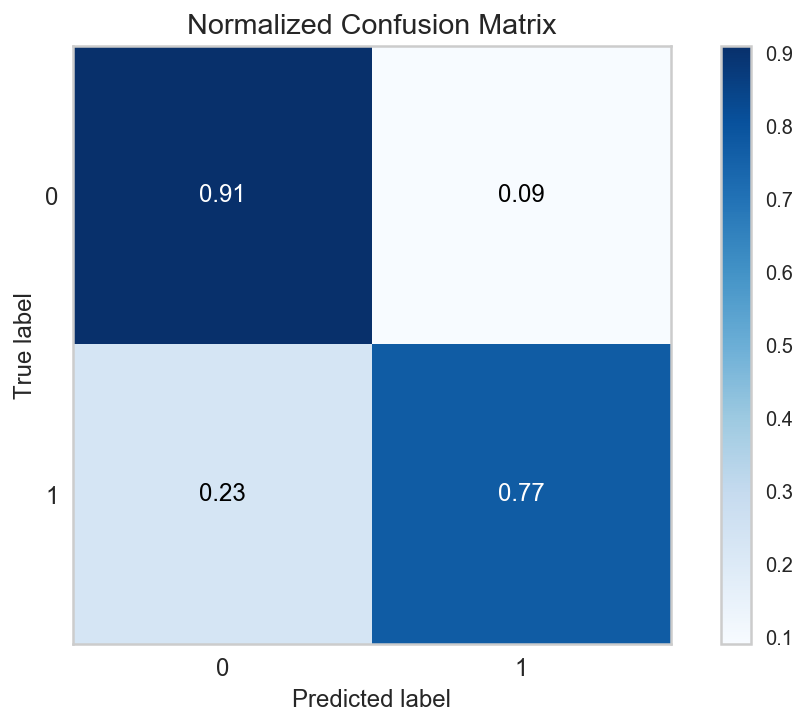

In [147]:
skplt.metrics.plot_confusion_matrix(y_test, pred_rf, normalize=True)
plt.show()

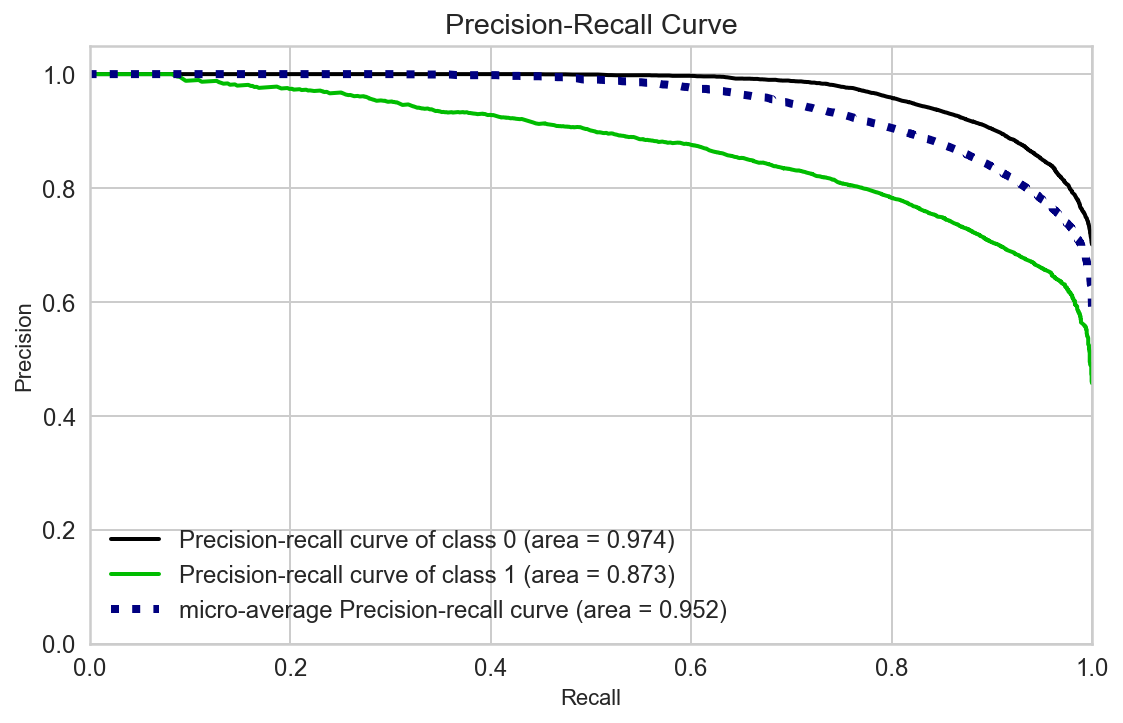

In [148]:
y_probas_rf = final_classifier_rf.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas_rf)
plt.show()

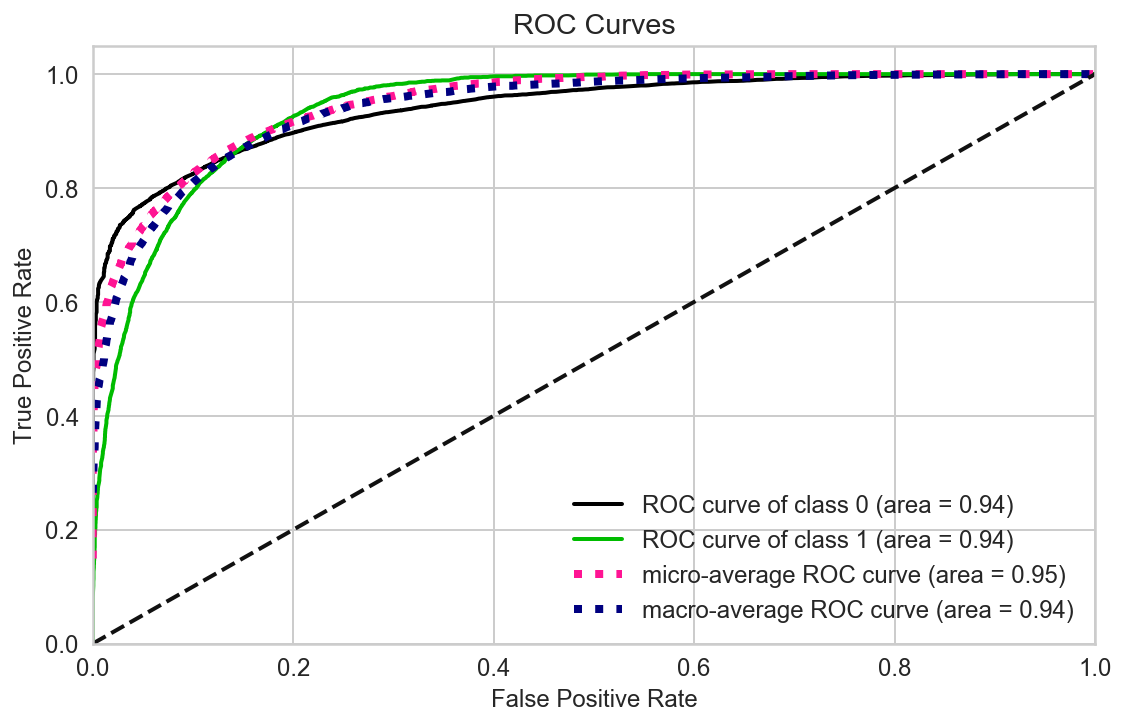

In [149]:
y_probas_rf = final_classifier_rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_rf)
plt.show()

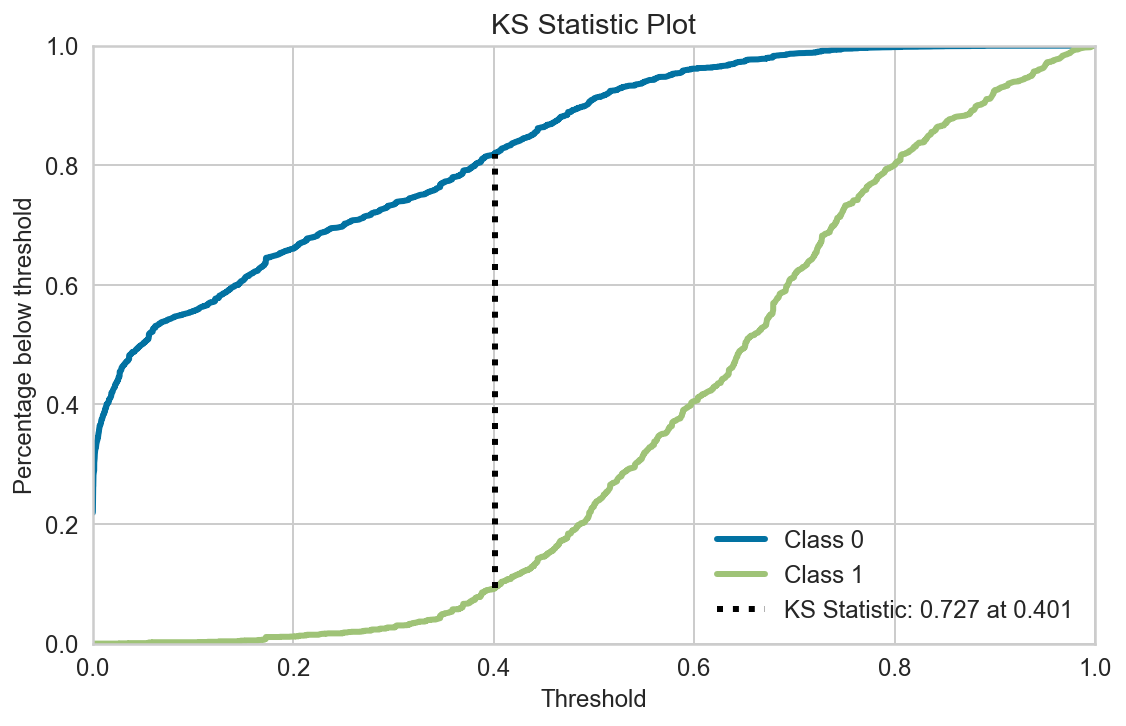

In [150]:
y_probas_rf = final_classifier_rf.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test, y_probas_rf)
plt.show()

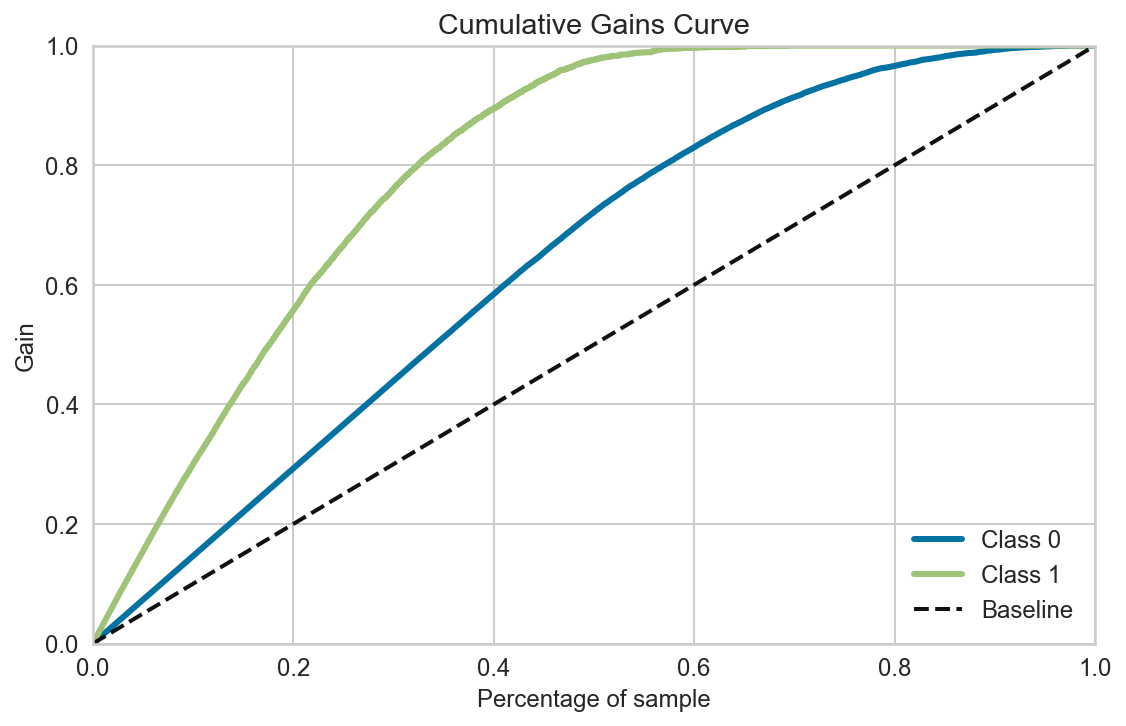

In [151]:
y_probas_rf = final_classifier_rf.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas_rf)
plt.show()

## Last one is the Decison tree which i will bag first

In [152]:
from sklearn.ensemble import BaggingClassifier

In [153]:
model = BaggingClassifier(base_estimator=clf, n_estimators=10)
params = {'max_samples': np.linspace(0.8, 1.0, 3),
          'max_features': range(int(3/4.*data.shape[1]), data.shape[1]+1)}

grid = GridSearchCV(model, param_grid=params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_samples': array([0.8, 0.9, 1. ]), 'max_features': range(38, 52)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [154]:
np.mean(cross_val_score(grid.best_estimator_, X_test, y_test))

0.755639044579682

In [155]:
final_classifier_dt = grid.best_estimator_.fit(X_test, y_test)
final_classifier_dt

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=39,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [156]:
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(final_classifier_dt.score(X_test, y_test)))

Accuracy of DT classifier on test set: 0.86


In [157]:
pred_dt = final_classifier_dt.predict(X_test)
print(confusion_matrix(y_test, pred_dt))
print(classification_report(y_test, pred_dt))

[[5102  558]
 [ 643 1988]]
             precision    recall  f1-score   support

          0       0.89      0.90      0.89      5660
          1       0.78      0.76      0.77      2631

avg / total       0.85      0.86      0.85      8291



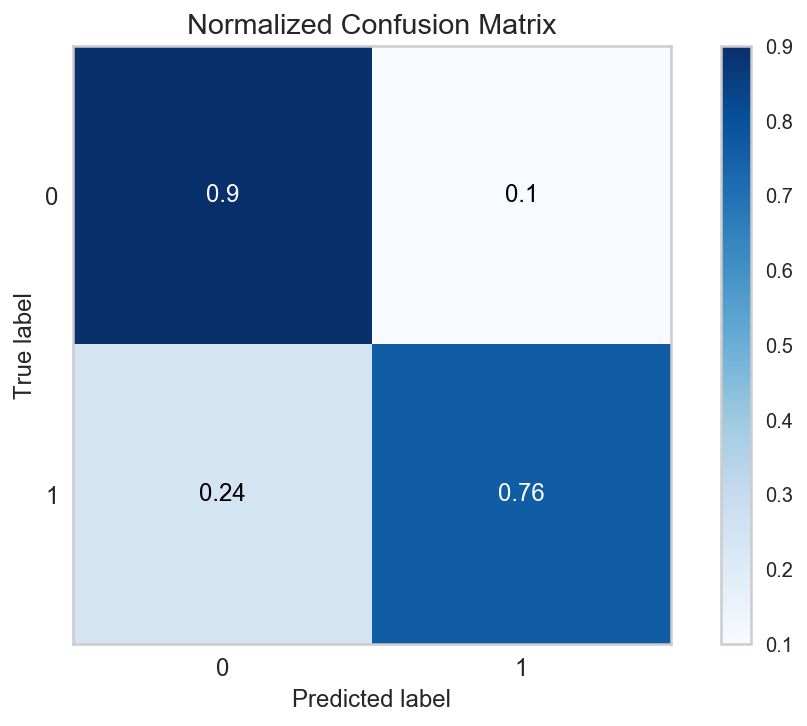

In [158]:
skplt.metrics.plot_confusion_matrix(y_test, pred_dt, normalize=True)
plt.show()

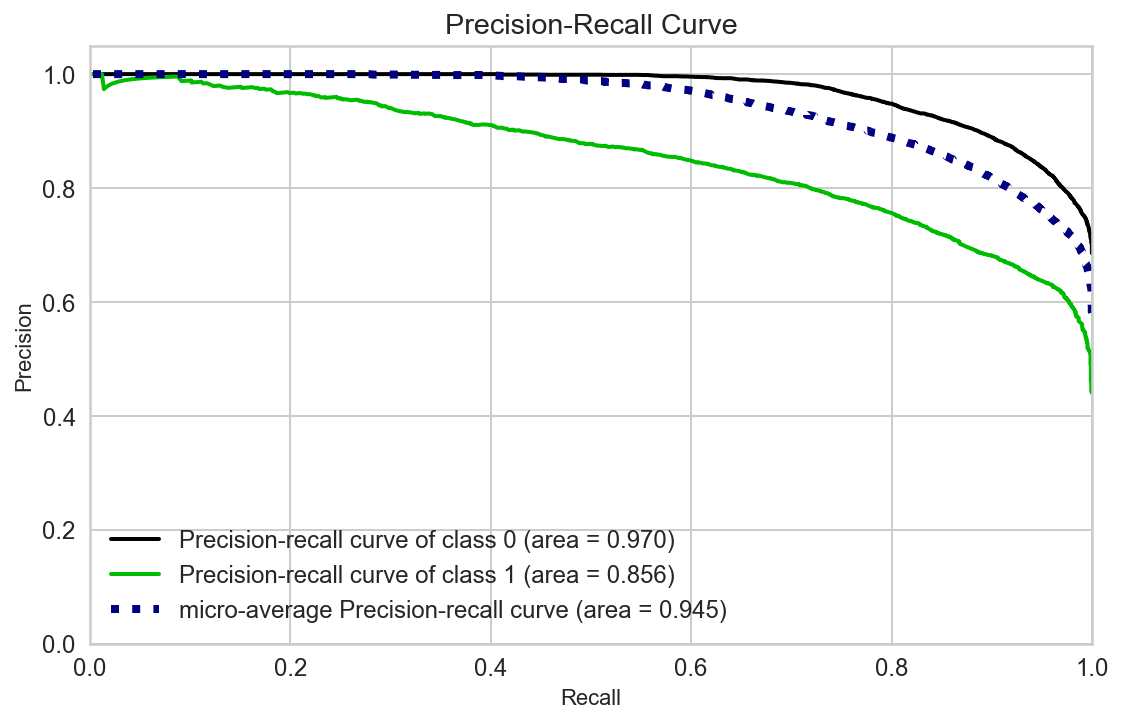

In [159]:
y_probas_dt = final_classifier_dt.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas_dt)
plt.show()

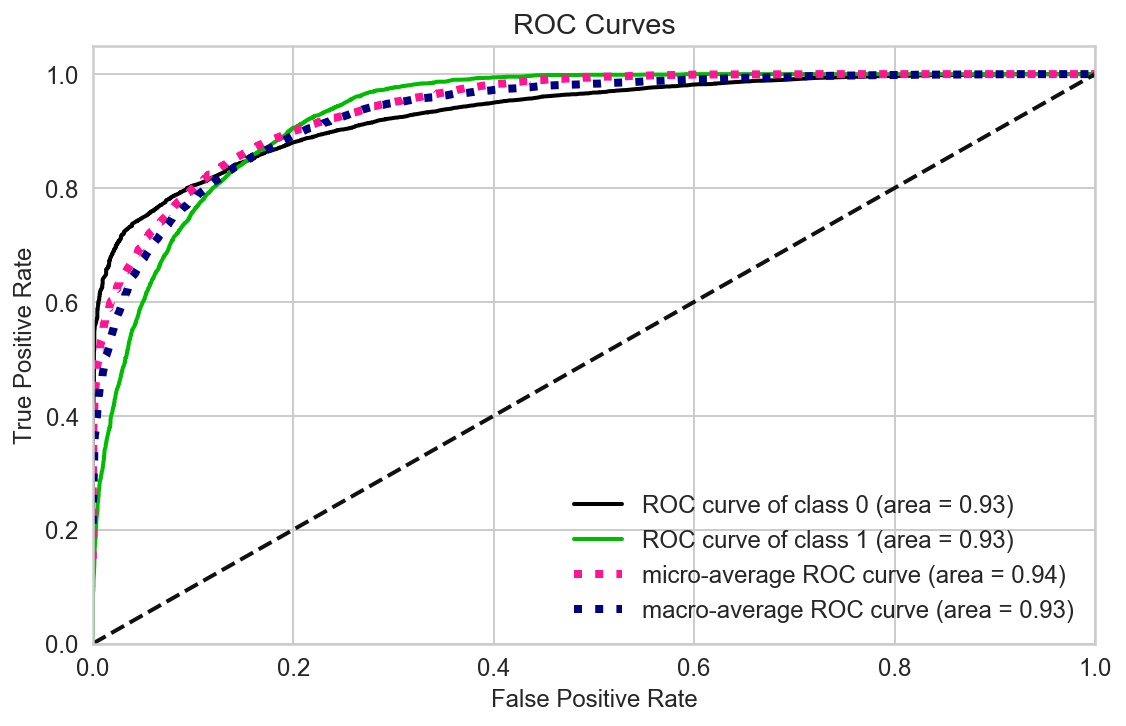

In [160]:
y_probas_dt = final_classifier_dt.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_dt)
plt.show()

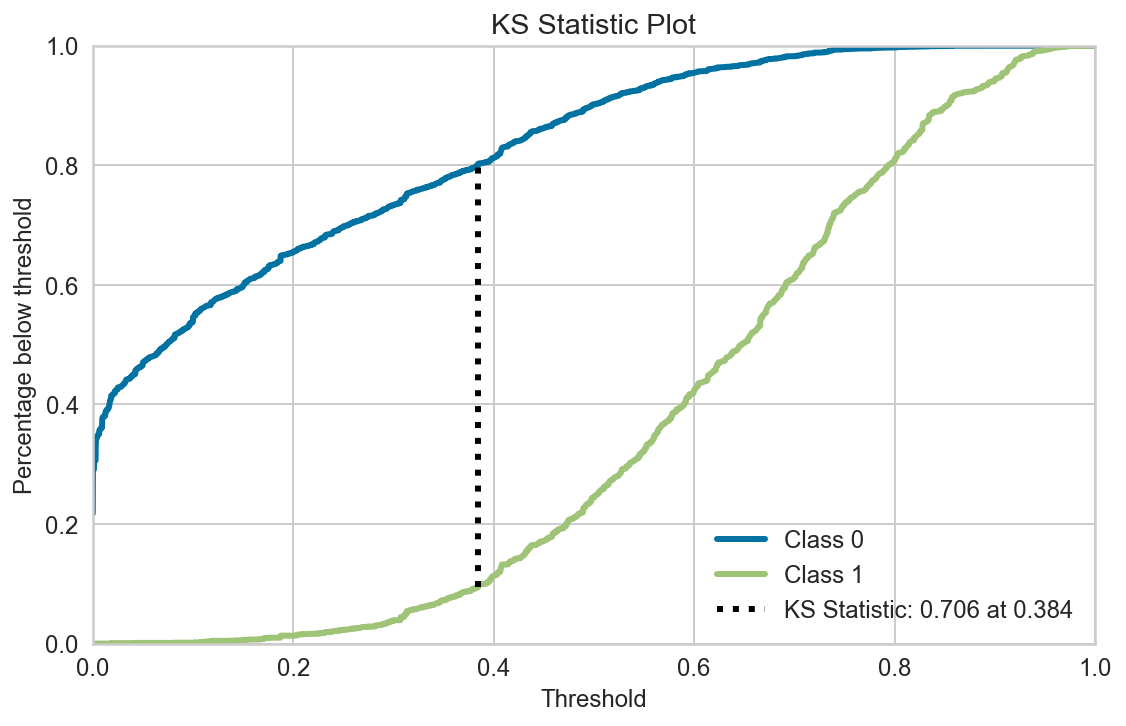

In [161]:
y_probas_dt = final_classifier_dt.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test, y_probas_dt)
plt.show()

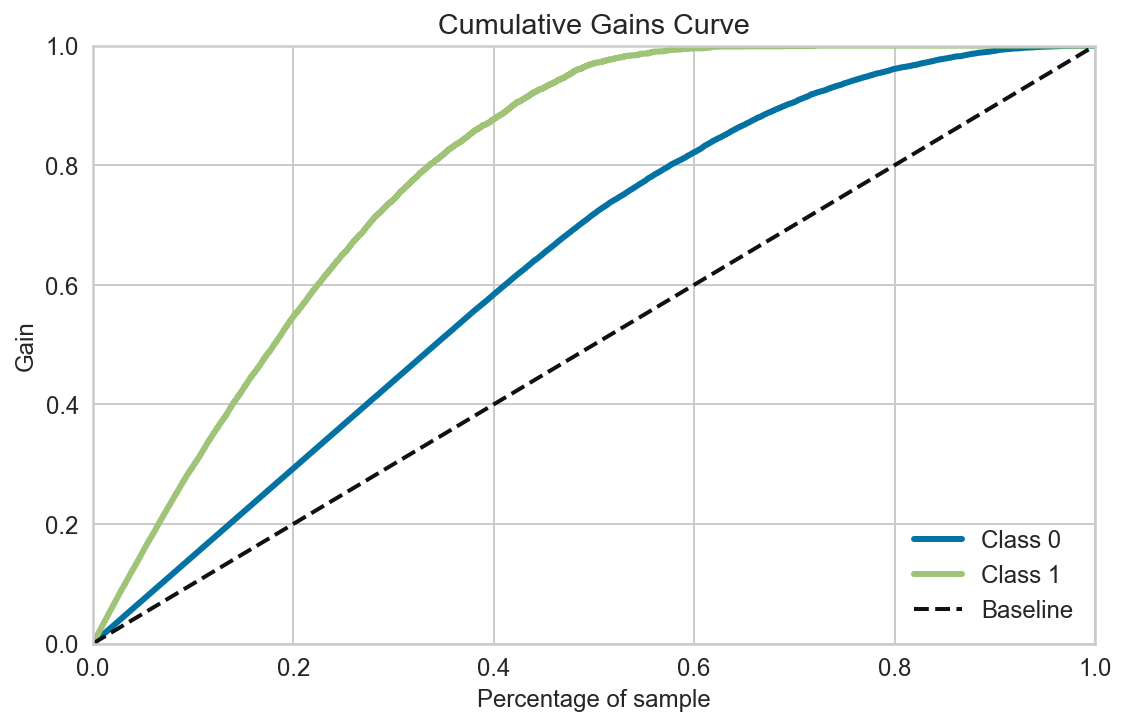

In [162]:
y_probas_dt = final_classifier_dt.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas_dt)
plt.show()

In [163]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in final_classifier_dt.estimators_
], axis=0)

In [164]:
features = list(X_test.columns)

In [165]:
fi=pd.DataFrame(list(zip(features,feature_importances)))

In [174]:
fi.columns=['features', 'feature_importances']
fi.head()

features  feature_importances
0  neighbours             0.027360
1        year             0.014315
2    inter1_2             0.015651
3    inter1_3             0.005486
4    inter1_4             0.047534

In [175]:
fi.sort_values(by=['feature_importances'])

# >>> df.sort_values(by=['col1'])


features  feature_importances
3                                       inter1_3             0.005486
35          country_Democratic Republic of Congo             0.008134
27   event_type_Headquarters or base established             0.008990
37                              country_Ethiopia             0.009051
33                                country_Angola             0.009547
9                                       inter2_4             0.010077
20                                interaction_37             0.011951
18                                interaction_30             0.013184
25                                interaction_78             0.013743
1                                           year             0.014315
26      event_type_Battle-No change of territory             0.015011
31              event_type_Strategic development             0.015052
5                                       inter1_6             0.015349
2                                       inter1_2             0.015651
10                                      inter2_5             0.016578
24                                interaction_60             0.018360
32         event_type_Violence against civilians             0.020905
38                           country_Ivory Coast             0.021145
36                                 country_Egypt             0.021579
19                                interaction_34             0.023437
14                                interaction_15             0.024113
21                                interaction_47             0.024206
7                                       inter2_1             0.024937
6                                       inter1_8             0.026757
30                     event_type_Riots/Protests             0.027305
0                                     neighbours             0.027360
28  event_type_Non-violent transfer of territory             0.029536
17                                interaction_27             0.030085
23                                interaction_58             0.034639
16                                interaction_20             0.034959
8                                       inter2_3             0.037774
29                    event_type_Remote violence             0.038821
12                                interaction_12             0.044232
13                                interaction_13             0.044553
4                                       inter1_4             0.047534
22                                interaction_57             0.051443
15                                interaction_17             0.054233
34              country_Central African Republic             0.054293
11                                      inter2_7             0.055675

I'm commenting this out also because i generated the tree and its massive and takes far too long to run

In [ ]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus

In [ ]:
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [ ]:
# graph.write_png('./dtr1.png')

Okay so this final step will allow me to compare the different models together

In [176]:
probas_list=[y_probas_dt, y_probas, y_probas_rf]
class_names=['Decision Trees', 'KNN', 'Random Forest']

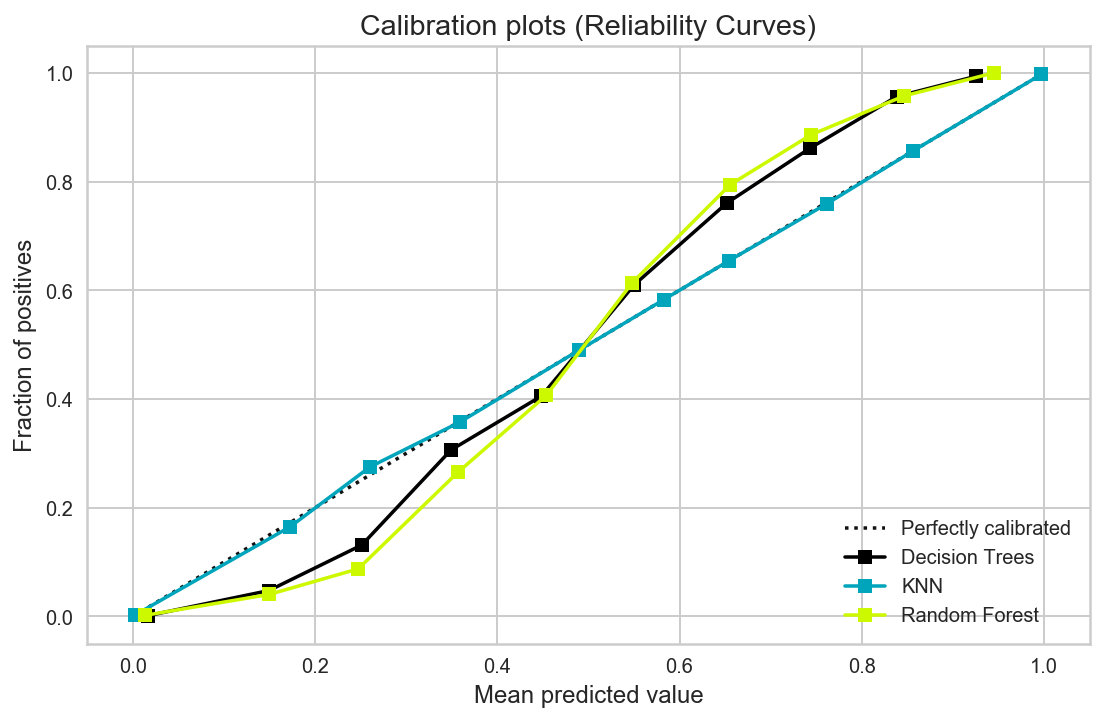

In [177]:
skplt.metrics.plot_calibration_curve(y_test, probas_list, class_names)
plt.show()

When performing classification you often want not only to predict the class label, but also obtain a probability of the respective label. This probability gives you some kind of confidence on the prediction. Some models can give you poor estimates of the class probabilities and some even do not not support probability prediction. The calibration module allows you to better calibrate the probabilities of a given model, or to add support for probability prediction.

Well calibrated classifiers are probabilistic classifiers for which the output of the predict_proba method can be directly interpreted as a confidence level. For instance, a well calibrated (binary) classifier should classify the samples such that among the samples to which it gave a predict_proba value close to 0.8, approximately 80% actually belong to the positive class. 

http://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html

http://scikit-plot.readthedocs.io/en/stable/Quickstart.html

In [178]:
model_names=['Logistic Regression', 'Decision Tree Classifier', 'KNeighbours Classifier', 'Linear Discriminant Analysis', 'GaussianNB', 'Support Vector Machines', 'Neural Networks', 'Random Forest']

In [179]:
training_scores=[0.75, 0.84, 0.80, 0.75, 0.69, 0.77, 0.68, 0.84]

In [180]:
test_scores=[0.75, 0.77, 0.76, 0.75, 0.68, 0.76, 0.68, 0.78]

In [181]:
GS_scores=[0, 0.86, 0.87, 0, 0, 0.8, 0, 0.87]

In [189]:
df=pd.DataFrame()

In [190]:
df['Training Scores']=training_scores
df['Test Scores']=test_scores
df['GridSearch']=GS_scores
df['Classifier']=model_names

In [191]:
df.head(2)

Training Scores  Test Scores  GridSearch                Classifier
0             0.75         0.75        0.00       Logistic Regression
1             0.84         0.77        0.86  Decision Tree Classifier

In [192]:
df.set_index('Classifier', inplace=True)
df['Classifier_Names']=model_names

In [193]:
df

Training Scores  Test Scores  GridSearch  \
Classifier                                                               
Logistic Regression                      0.75         0.75        0.00   
Decision Tree Classifier                 0.84         0.77        0.86   
KNeighbours Classifier                   0.80         0.76        0.87   
Linear Discriminant Analysis             0.75         0.75        0.00   
GaussianNB                               0.69         0.68        0.00   
Support Vector Machines                  0.77         0.76        0.80   
Neural Networks                          0.68         0.68        0.00   
Random Forest                            0.84         0.78        0.87   

                                          Classifier_Names  
Classifier                                                  
Logistic Regression                    Logistic Regression  
Decision Tree Classifier          Decision Tree Classifier  
KNeighbours Classifier              KNeighbours Classifier  
Linear Discriminant Analysis  Linear Discriminant Analysis  
GaussianNB                                      GaussianNB  
Support Vector Machines            Support Vector Machines  
Neural Networks                            Neural Networks  
Random Forest                                Random Forest

/Users/alexandra/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


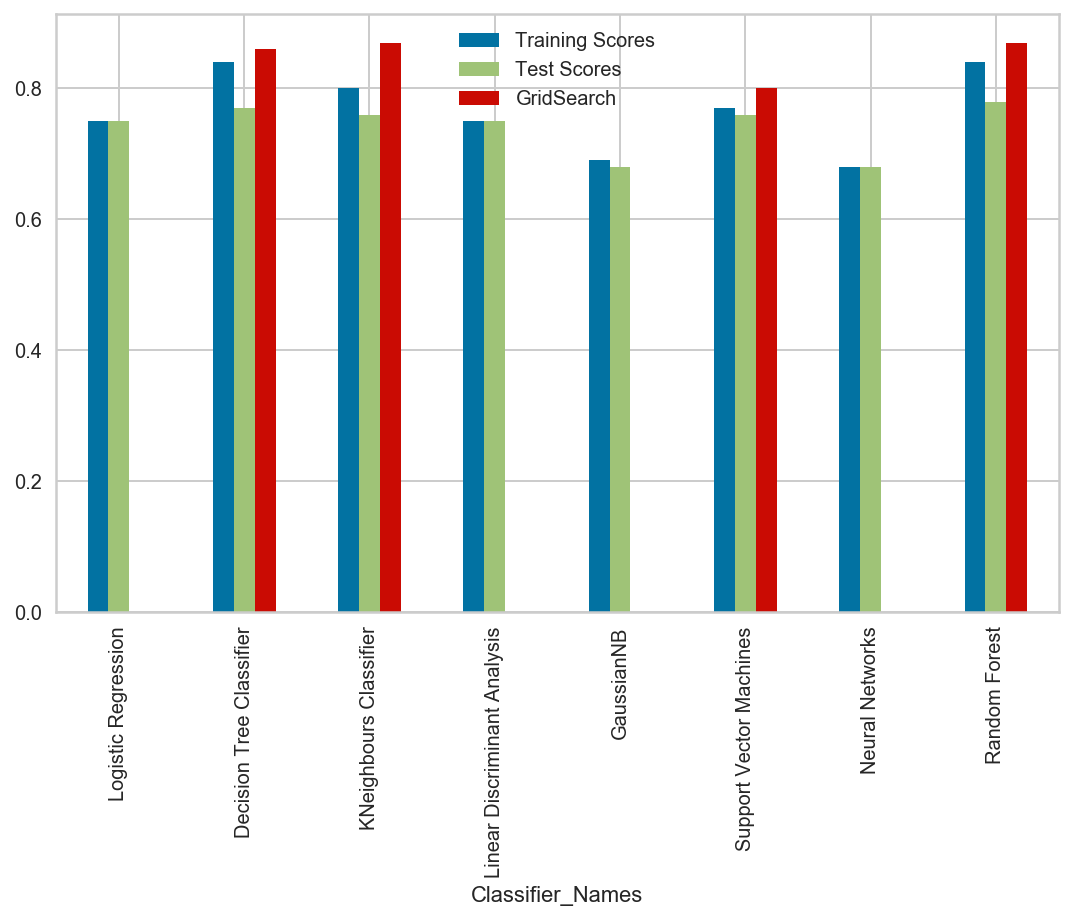

In [194]:
df.plot(x='Classifier_Names', y=['Training Scores', 'Test Scores', 'GridSearch'], kind='bar')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

sns.countplot(conflicts['neighbours'], label='Count', ax=ax)
plt.xticks(rotation=90)
plt.show()

overfitting. This seems to be an issue as my top 3 performers seem to have overfit. The grid search seems to have done a good job at correcting that.

# Time Series Analysis

In [198]:
tsa=conflicts[['year', 'event_date', 'fatalities']]
tsa.head(3)

year  event_date  fatalities
0  2001  18/04/2001           1
1  2001  19/04/2001           0
2  2001  20/04/2001           0

In [199]:
tsa['deadly']= [1 if i > 0 else 0 for i in conflicts.fatalities]

/Users/alexandra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [200]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165808 entries, 0 to 165807
Data columns (total 4 columns):
year          165808 non-null int64
event_date    165808 non-null object
fatalities    165808 non-null int64
deadly        165808 non-null int64
dtypes: int64(3), object(1)
memory usage: 11.3+ MB


In [201]:
tsa1=tsa.sample(frac=0.2, random_state=1)

In [202]:
tsa1['event_date'] = pd.to_datetime(tsa.event_date)

In [203]:
tsa1.dtypes

year                   int64
event_date    datetime64[ns]
fatalities             int64
deadly                 int64
dtype: object

In [204]:
tsa1['month']=tsa1.event_date.dt.month
tsa1.month.head()

148345     3
45752     11
107284    10
80089      5
165648     1
Name: month, dtype: int64

In [210]:
tsa1 = tsa1.rename(columns={'year': 'y'})


In [212]:
tsa1.head(3)

y event_date  fatalities  deadly  month  ds
148345  2008 2008-03-26           1       1      3  26
45752   2002 2002-11-12           9       1     11  12
107284  2007 2007-10-08           4       1     10   8

In [ ]:
from fbprophet import Prophet

In [307]:
tsa_2['month'] = tsa_1.resample('M').count().month

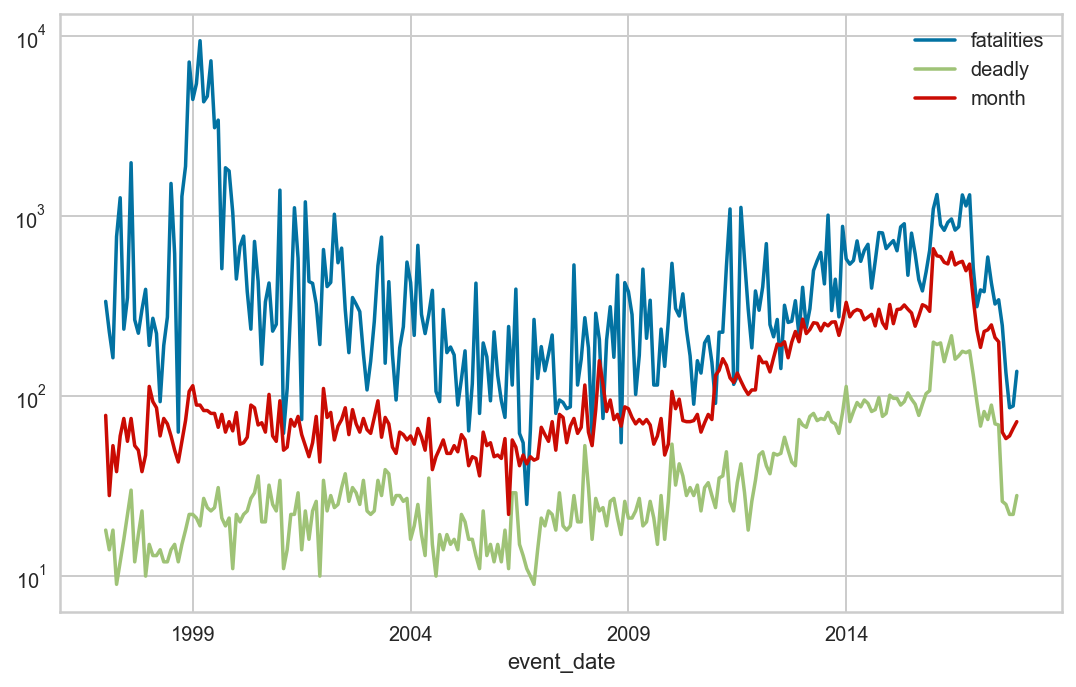

In [308]:
tsa_2.plot(logy=True)

In [309]:
tsa_2.head()

fatalities  deadly  month
event_date                           
1997-01-31         335      18     78
1997-02-28         227      14     28
1997-03-31         163      18     53
1997-04-30         767       9     38
1997-05-31        1260      12     60

Prophet is a procedure for forecasting time series data.  It is based on an additive model where non-linear trends are fit with yearly and weekly seasonality, plus holidays. Prophet is designed for analyzing time series with daily observations that display patterns on different time scales.
https://github.com/facebook/prophet/tree/master/python

In [213]:
from fbprophet import Prophet

In [230]:
# m = Prophet()
# m.fit(tsa1)  
# future = m.make_future_dataframe(periods=365)
# m.predict(future)

Unfortunately this returned MemoryError and i dont have time to try anything else!!

# A tiny taster of NLP (but not really :))

In [215]:
from wordcloud import WordCloud, STOPWORDS

In [216]:
text=conflicts.notes
text[1]

'Riots were reported in numerous villages in Kabylie, resulting in dozens wounded in clashes between protesters and police and significant material damage.'

In [217]:
text.isnull().sum()

10227

In [218]:
type(text)

pandas.core.series.Series

In [219]:
text=text.dropna()

In [220]:
text.isnull().sum()

0

In [221]:
len(text)

155581

In [222]:
stopwords= set(STOPWORDS)

In [223]:
stopwords.update('MDC')

In [224]:
tokens = []
for word in text:
    words=word.lower().split()
    tokens.extend(words)

In [225]:
tokens

['a',
 'berber',
 'student',
 'was',
 'shot',
 'while',
 'in',
 'police',
 'custody',
 'at',
 'a',
 'police',
 'station',
 'in',
 'beni',
 'douala.',
 'he',
 'later',
 'died',
 'on',
 'apr.21.',
 'riots',
 'were',
 'reported',
 'in',
 'numerous',
 'villages',
 'in',
 'kabylie,',
 'resulting',
 'in',
 'dozens',
 'wounded',
 'in',
 'clashes',
 'between',
 'protesters',
 'and',
 'police',
 'and',
 'significant',
 'material',
 'damage.',
 'students',
 'protested',
 'in',
 'the',
 'amizour',
 'area.',
 'at',
 'least',
 '3',
 'were',
 'later',
 'arrested',
 'for',
 'allegedly',
 'insulting',
 'gendarmes.',
 'rioters',
 'threw',
 'molotov',
 'cocktails,',
 'rocks',
 'and',
 'burning',
 'tires',
 'at',
 'gendarmerie',
 'stations',
 'in',
 'beni',
 'douala,',
 'el-kseur',
 'and',
 'amizour.',
 'rioters',
 'threw',
 'molotov',
 'cocktails,',
 'rocks',
 'and',
 'burning',
 'tires',
 'at',
 'gendarmerie',
 'stations',
 'in',
 'beni',
 'douala,',
 'el-kseur',
 'and',
 'amizour.',
 'rioters',
 'thre

In [226]:
tokens_clean=[word for word in tokens if word not in stopwords]

In [247]:
wordcloud2=WordCloud(background_color='white',width=5800,
                          height=3000,max_words=100, relative_scaling=0.8, stopwords=stopwords).generate(str(text))

In [248]:
print(wordcloud2)

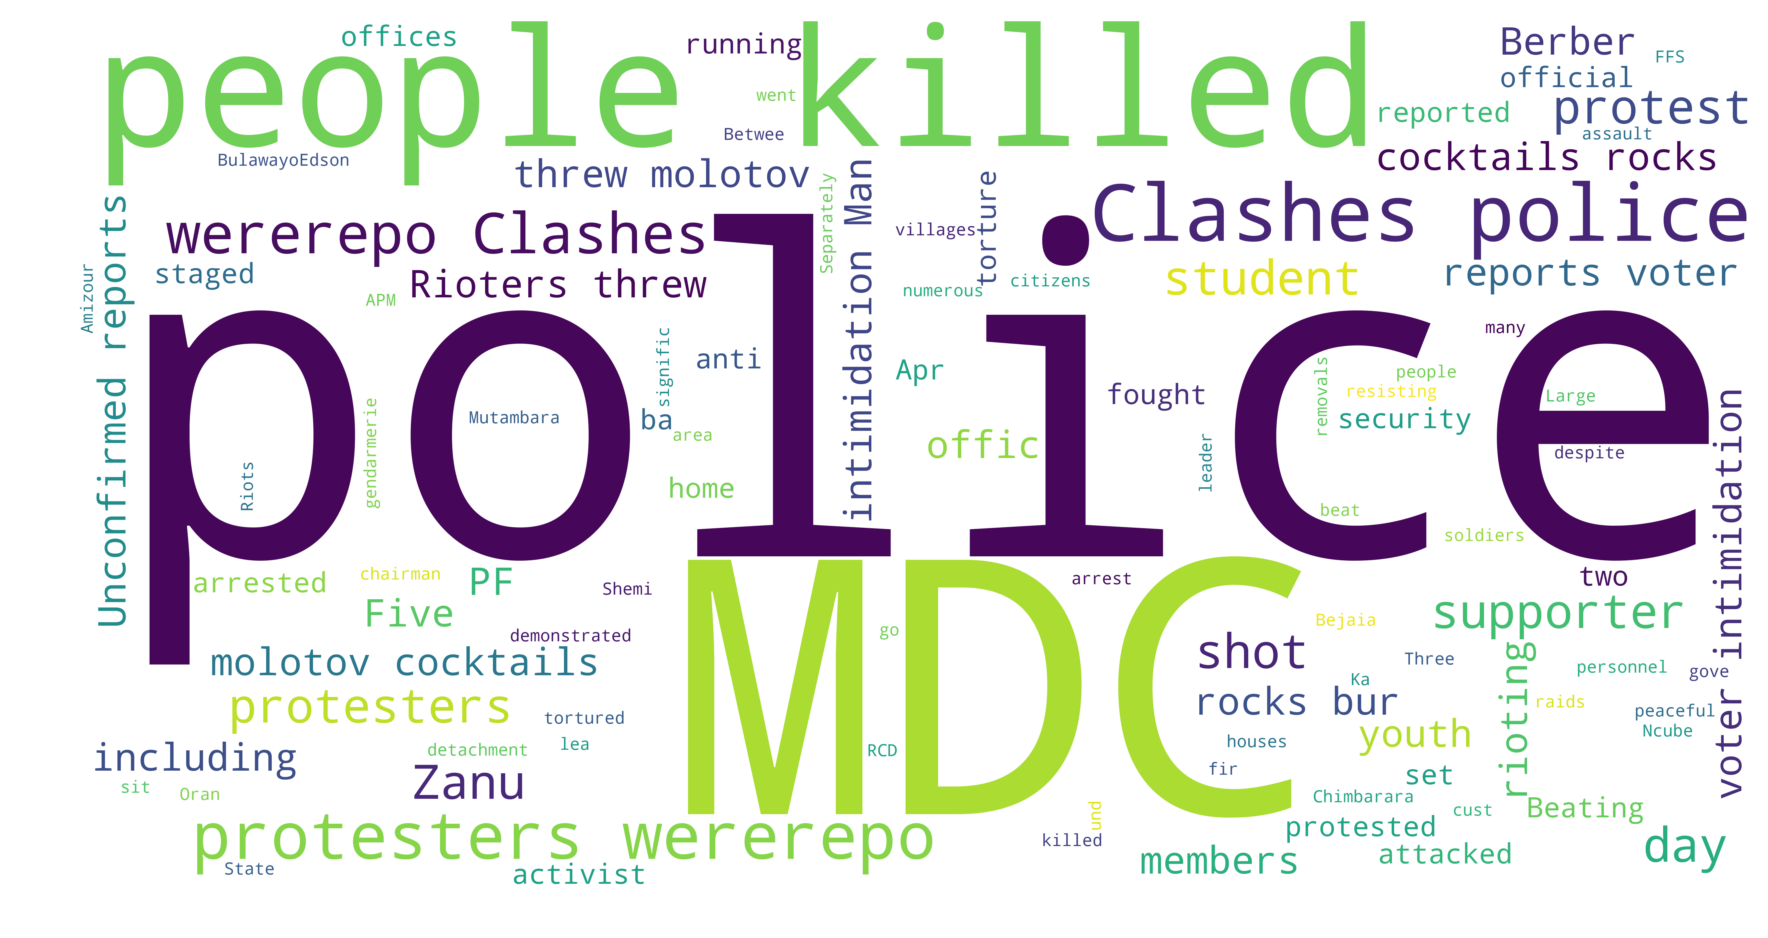

In [249]:
fig = plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1200)

In [237]:
from collections import Counter
counts=Counter(tokens_clean)

In [238]:
counts.most_common(20)

[('killed', 26468),
 ('police', 22761),
 ('forces', 20893),
 ('two', 17686),
 ('protest', 14108),
 ('people', 13358),
 ('attack', 12247),
 ('government', 11674),
 ('soldiers', 10586),
 ('attacked', 10273),
 ('al', 9839),
 ('one', 9707),
 ('group', 9595),
 ('military', 9288),
 ('armed', 9128),
 ('shabaab', 8701),
 ('rebels', 8595),
 ('near', 8195),
 ('security', 8059),
 ('three', 7925)]

In [239]:
from textblob import TextBlob, Word
import re

In [240]:
string= text.to_string()

In [241]:
blob=TextBlob(string)

In [242]:
blob.sentiment

Sentiment(polarity=-0.07327669779923575, subjectivity=0.2522611370287405)